In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Importing datasets

In [379]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [380]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [381]:
sales['revenue'] = sales['revenue'].fillna(0)

In [382]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["sales","revenue"].resample("W").sum()
sales_grouped = sales_grouped.reset_index()

In [383]:
sales_grouped

,store_id,date,sales,revenue
0,S0002,2017-01-08,750.232,1813.24
1,S0002,2017-01-15,871.530,1896.91
2,S0002,2017-01-22,1069.555,7404.16
3,S0002,2017-01-29,910.255,2078.39
4,S0002,2017-02-05,732.754,1745.47
...,...,...,...,...
8605,S0143,2019-10-06,18.000,80.82
8606,S0143,2019-10-13,0.000,0.00
8607,S0143,2019-10-20,0.000,0.00
8608,S0143,2019-10-27,0.000,0.00


In [384]:
sales_grouped.isna().sum()

store_id    0
date        0
sales       0
revenue     0
dtype: int64

In [9]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [385]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped_v2 = sales_grouped.set_index("date")

In [386]:
sales_grouped_v2

,store_id,sales,revenue
date,,,
2017-01-08,S0002,750.232,1813.24
2017-01-15,S0002,871.530,1896.91
2017-01-22,S0002,1069.555,7404.16
2017-01-29,S0002,910.255,2078.39
2017-02-05,S0002,732.754,1745.47
...,...,...,...
2019-10-06,S0143,18.000,80.82
2019-10-13,S0143,0.000,0.00
2019-10-20,S0143,0.000,0.00


In [114]:
# Get unique store IDs
store_ids = sales['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

# Seasonal decomposition

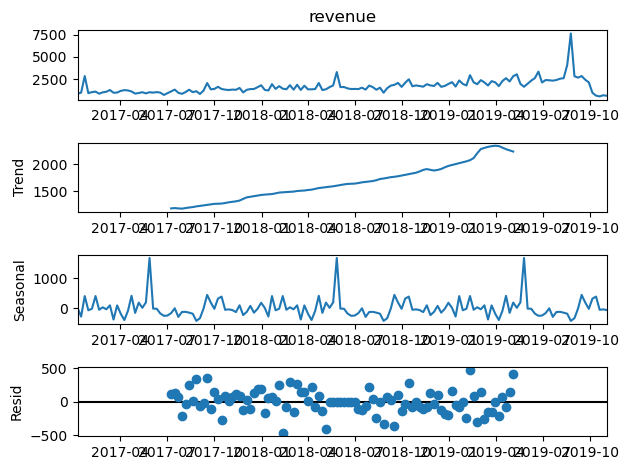

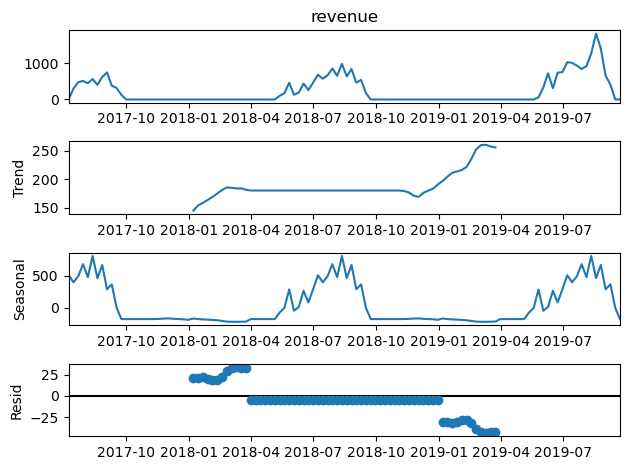

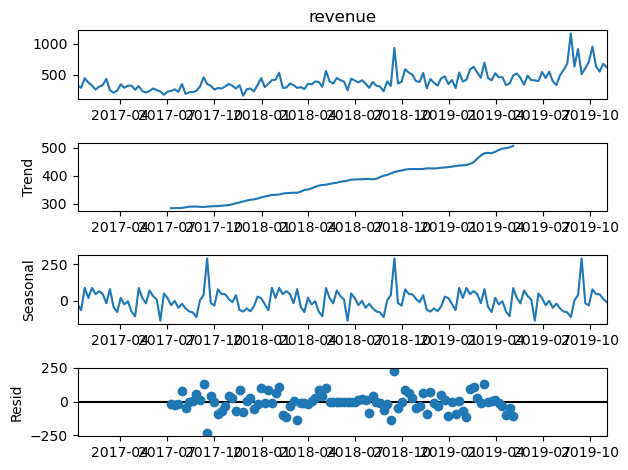

In [110]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# List of store IDs to plot
stores_to_plot = ['S0050', 'S0136', 'S0143']

# Perform seasonal decomposition for each store ID
for store_id in stores_to_plot:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]

    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        continue

    # Perform seasonal decomposition for the specific store ID
    decomposition = seasonal_decompose(df_store['revenue'], model='additive', period=52)

    # Check if the current store ID is in the list of stores to plot
    if store_id in stores_to_plot:
        # Plot the decomposition for the selected store ID
        fig = decomposition.plot()
        #plt.title(f"Seasonal Decomposition - Store ID: {store_id}")
        plt.show()

# Revenue plot per store

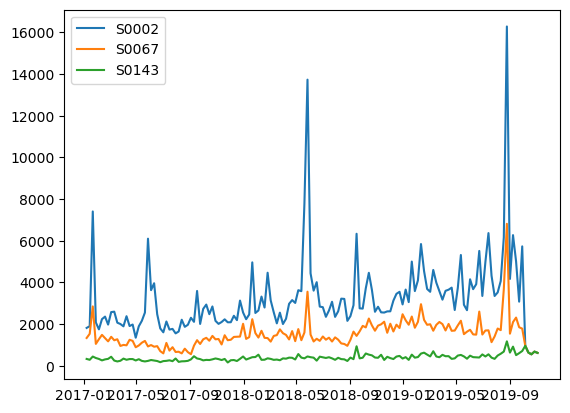

In [160]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"revenue"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0067"].loc[:,"revenue"], label = "S0067")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0143"].loc[:,"revenue"], label = "S0143")
plt.legend(loc="upper left")
plt.show()

# Subset dataset into train and test set

Let's use last 4 weeks as test set

In [111]:
train = sales_grouped_v2['2017-01-08' :'2019-09-08']
test = sales_grouped_v2['2019-09-08' :'2019-09-29']
test

,store_id,sales,revenue
date,,,
2019-09-08,S0002,598.00,6267.91
2019-09-15,S0002,656.00,5007.57
2019-09-22,S0002,525.00,3074.56
2019-09-29,S0002,656.16,5728.25
2019-09-08,S0003,227.00,1302.61
...,...,...,...
2019-09-29,S0142,302.00,1866.41
2019-09-08,S0143,104.00,915.27
2019-09-15,S0143,63.00,507.08


# Train vs Test

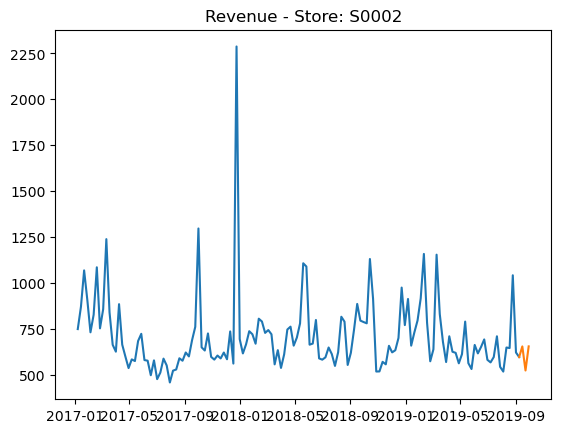

In [15]:
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label = "Train")
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"],label = "Test")
plt.title("Revenue - Store: S0002")
plt.show()

# First model - Simple average

In [16]:
# Simple average
avg = test.copy().reset_index()
mean_revenue = train.groupby(["store_id"])["revenue"].mean().reset_index()

for i in range(len(avg)):
    for j in range(len(mean_revenue)):
        if avg.loc[i, "store_id"] == mean_revenue.loc[j, "store_id"]:
            avg.loc[i, 'avg_revenue'] = mean_revenue.loc[j, "revenue"]

avg = avg.set_index("date")

In [161]:
avg

,store_id,sales,revenue,avg_revenue
date,,,,
2019-09-08,S0002,598.00,6267.91,3290.336357
2019-09-15,S0002,656.00,5007.57,3290.336357
2019-09-22,S0002,525.00,3074.56,3290.336357
2019-09-29,S0002,656.16,5728.25,3290.336357
2019-09-08,S0003,227.00,1302.61,879.066429
...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1377.464000
2019-09-08,S0143,104.00,915.27,377.227786
2019-09-15,S0143,63.00,507.08,377.227786


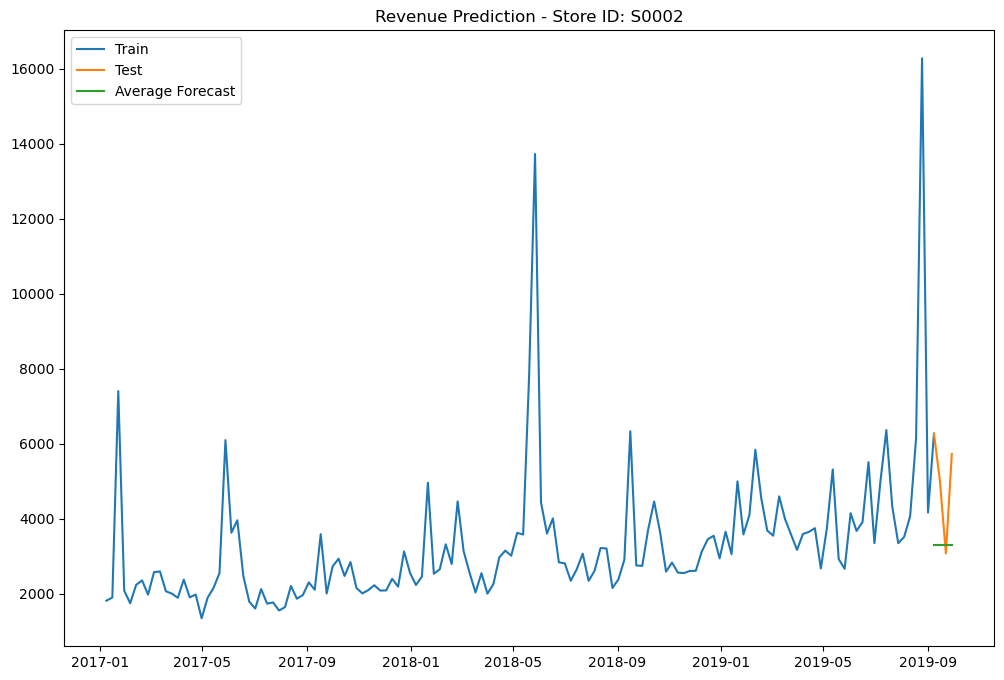

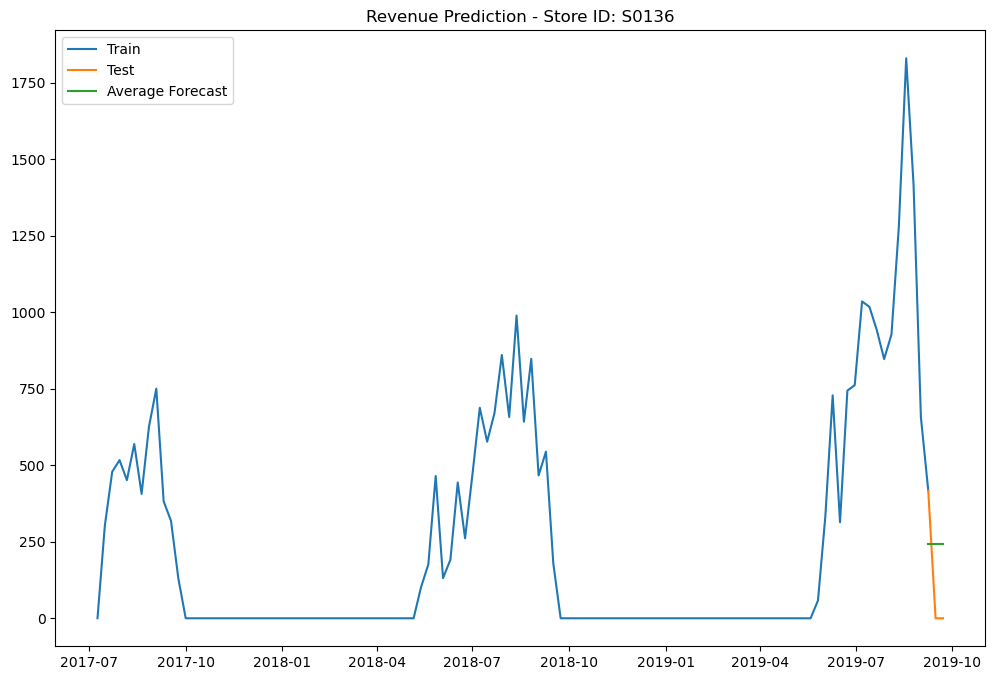

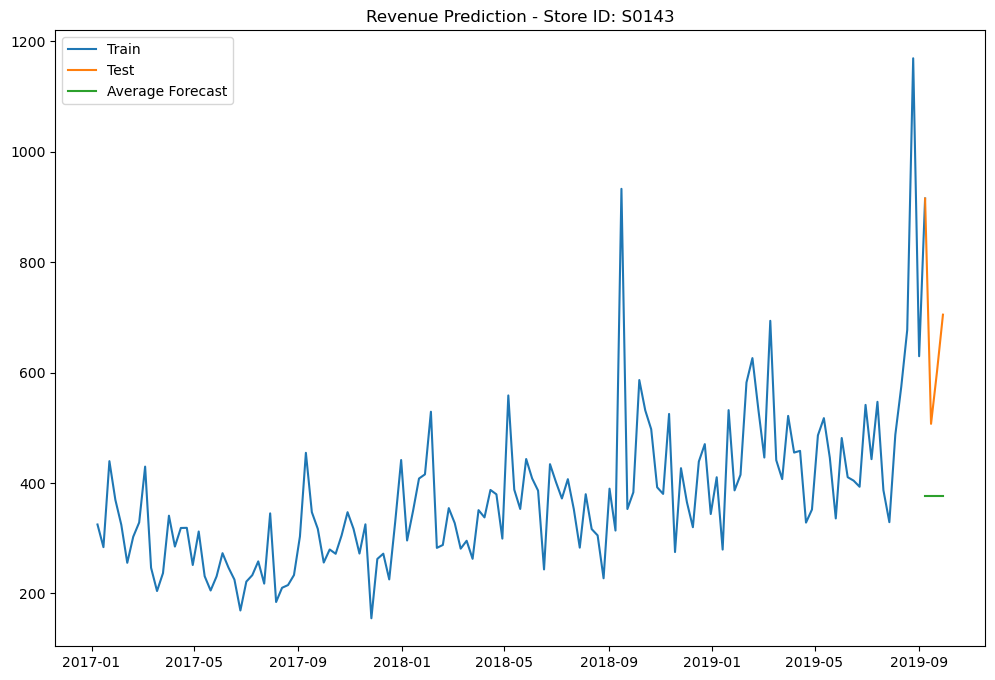

In [17]:
store_ids_plot = ["S0002", "S0136", "S0143"]

for store_id in store_ids_plot:
    plt.figure(figsize=(12,8))
    plt.plot(train[train["store_id"] == store_id].loc[:,"revenue"], label='Train')
    plt.plot(test[test["store_id"] == store_id].loc[:,"revenue"], label='Test')
    plt.plot(avg[avg["store_id"] == store_id].loc[:,"avg_revenue"], label='Average Forecast')
    plt.title(f"Revenue Prediction - Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [652]:
revenue = sales_grouped_v2.copy()
revenue["revenue_avg"] = revenue["revenue"]
revenue

,store_id,sales,revenue,revenue_avg
date,,,,
2017-01-08,S0002,750.232,1813.24,1813.24
2017-01-15,S0002,871.530,1896.91,1896.91
2017-01-22,S0002,1069.555,7404.16,7404.16
2017-01-29,S0002,910.255,2078.39,2078.39
2017-02-05,S0002,732.754,1745.47,1745.47
...,...,...,...,...
2019-10-06,S0143,18.000,80.82,80.82
2019-10-13,S0143,0.000,0.00,0.00
2019-10-20,S0143,0.000,0.00,0.00


# Model evalution

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_revenue_avg = sqrt(mean_squared_error(test["revenue"], avg.avg_revenue))
rmse_revenue_avg

1241.6886495914234

In [162]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create an empty list to store the RMSE for each store
rmse_per_store_avg = []

for store_id in store_ids:
    # Filter the test data for the specific store ID
    test_store = test[test["store_id"] == store_id]
    avg_store = avg[df_test_arimax["store_id"] == store_id]
    
    # Ensure consistent lengths
    test_store = test_store[:len(avg_store)]
    
    # Calculate the RMSE for the specific store
    rmse = sqrt(mean_squared_error(avg_store["avg_revenue"], test_store["revenue"]))
    
    # Append the RMSE to the list
    rmse_per_store_avg.append((store_id, rmse))

# Print the RMSE for each store
for store_id, rmse in rmse_per_store_avg:
    print(f"Store ID: {store_id}, RMSE_avg: {rmse}")

Store ID: S0002, RMSE_avg: 2109.7878180713337
Store ID: S0003, RMSE_avg: 403.0318749339252
Store ID: S0005, RMSE_avg: 74.61759008048257
Store ID: S0007, RMSE_avg: 180.1452941325148
Store ID: S0010, RMSE_avg: 666.0218834407311
Store ID: S0012, RMSE_avg: 541.949524588418
Store ID: S0014, RMSE_avg: 488.62524237428784
Store ID: S0015, RMSE_avg: 594.4541548975834
Store ID: S0016, RMSE_avg: 250.44259103375165
Store ID: S0020, RMSE_avg: 2622.4068139127016
Store ID: S0022, RMSE_avg: 291.337901471034
Store ID: S0023, RMSE_avg: 755.8004280885068
Store ID: S0026, RMSE_avg: 2899.4986857484246
Store ID: S0030, RMSE_avg: 264.8672999862095
Store ID: S0032, RMSE_avg: 139.5192688725636
Store ID: S0036, RMSE_avg: 467.7073063626121
Store ID: S0038, RMSE_avg: 2552.073274853823
Store ID: S0039, RMSE_avg: 290.2473628734195
Store ID: S0040, RMSE_avg: 978.207218574662
Store ID: S0041, RMSE_avg: 74.83375767619032
Store ID: S0045, RMSE_avg: 216.60200579587416
Store ID: S0046, RMSE_avg: 192.6179174537688
Store I

# Revenue Prediction with Simple Average

In [536]:
# Simple average
avg_prediction = revenue.copy().reset_index()
mean_revenue = revenue.groupby(["store_id"])["revenue"].mean().reset_index()

for i in range(len(avg_prediction)):
    for j in range(len(mean_revenue)):
        if avg_prediction.loc[i, "store_id"] == mean_revenue.loc[j, "store_id"]:
            avg_prediction.loc[i, 'revenue_avg'] = mean_revenue.loc[j, "revenue"]

avg_prediction = avg_prediction.set_index("date")

In [596]:
mean_revenue

,store_id,revenue
0,S0002,3208.247770
1,S0003,858.016284
2,S0005,1109.353804
3,S0007,682.150313
4,S0010,2347.766216
...,...,...
58,S0132,2072.637162
59,S0136,237.996034
60,S0141,312.848446
61,S0142,1341.352973


In [ ]:
mean_revenue_dict = mean_revenue.set_index('store_id')['revenue'].to_dict()
print(mean_revenue_dict)

for store_id in revenue['store_id'].unique():
    mean_revenue_value = mean_revenue_dict.get(store_id)
    print(mean_revenue_value)
    if mean_revenue_value is not None:
        last_5_rows_index = revenue[revenue['store_id'] == store_id].tail(5).index
        print(last_5_rows_index)
        revenue[revenue["store_id"] == store_id].loc[last_5_rows_index, 'revenue_avg'] = mean_revenue_value
        print(revenue[revenue["store_id"] == store_id])

In [653]:
revenue[revenue["store_id"] == "S0003"]

,store_id,sales,revenue,revenue_avg
date,,,,
2017-01-08,S0003,264.67,546.47,546.47
2017-01-15,S0003,325.52,616.72,616.72
2017-01-22,S0003,309.00,1534.22,1534.22
2017-01-29,S0003,302.71,712.18,712.18
2017-02-05,S0003,283.60,731.45,731.45
...,...,...,...,...
2019-10-06,S0003,27.00,102.82,102.82
2019-10-13,S0003,0.00,0.00,0.00
2019-10-20,S0003,0.00,0.00,0.00


In [654]:
for store_id in revenue['store_id'].unique():
    print(store_id)
    mean_revenue_value = mean_revenue["revenue"][mean_revenue["store_id"] == store_id]
    print(mean_revenue_value)
    if mean_revenue_value is not None:
        last_5_rows_index = revenue[revenue['store_id'] == store_id].tail(5).index
        print(last_5_rows_index)
        for date in last_5_rows_index:
            print(date)
            revenue.loc[(revenue.index == date) & (revenue["store_id"] == store_id), 'revenue_avg'] = float(mean_revenue_value)
            #revenue[revenue["store_id"] == store_id].loc[date, 'revenue_avg'] = mean_revenue_value
            print(revenue[revenue["store_id"] == store_id])

S0002
0    3208.24777
Name: revenue, dtype: float64
DatetimeIndex(['2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03'],
              dtype='datetime64[ns]', name='date', freq=None)
2019-10-06 00:00:00
           store_id     sales  revenue  revenue_avg
date                                               
2017-01-08    S0002   750.232  1813.24   1813.24000
2017-01-15    S0002   871.530  1896.91   1896.91000
2017-01-22    S0002  1069.555  7404.16   7404.16000
2017-01-29    S0002   910.255  2078.39   2078.39000
2017-02-05    S0002   732.754  1745.47   1745.47000
...             ...       ...      ...          ...
2019-10-06    S0002    57.000   363.20   3208.24777
2019-10-13    S0002     0.000     0.00      0.00000
2019-10-20    S0002     0.000     0.00      0.00000
2019-10-27    S0002     0.000     0.00      0.00000
2019-11-03    S0002     0.000     0.00      0.00000

[148 rows x 4 columns]
2019-10-13 00:00:00
           store_id     sales  revenue  reven

In [658]:
revenue

,store_id,sales,revenue,revenue_avg
date,,,,
2017-01-08,S0002,750.232,1813.24,1813.240000
2017-01-15,S0002,871.530,1896.91,1896.910000
2017-01-22,S0002,1069.555,7404.16,7404.160000
2017-01-29,S0002,910.255,2078.39,2078.390000
2017-02-05,S0002,732.754,1745.47,1745.470000
...,...,...,...,...
2019-10-06,S0143,18.000,80.82,369.637095
2019-10-13,S0143,0.000,0.00,369.637095
2019-10-20,S0143,0.000,0.00,369.637095


In [534]:
for idx, row in revenue.iterrows():
    store_id = row['store_id']
    date = idx
    matching_row = avg_prediction[(avg_prediction['store_id'] == store_id) & (avg_prediction.index == pd.Timestamp(date))]
    if not matching_row.empty:
        revenue.loc[(revenue.index == idx) & (revenue['store_id'] == store_id), 'revenue_avg'] = matching_row.loc[matching_row.index[0], 'revenue_avg']

revenue

,store_id,sales,revenue,revenue_avg
date,,,,
2017-01-08,S0002,750.232,1813.24,3208.247770
2017-01-15,S0002,871.530,1896.91,3208.247770
2017-01-22,S0002,1069.555,7404.16,3208.247770
2017-01-29,S0002,910.255,2078.39,3208.247770
2017-02-05,S0002,732.754,1745.47,3208.247770
...,...,...,...,...
2019-10-06,S0143,18.000,80.82,369.637095
2019-10-13,S0143,0.000,0.00,369.637095
2019-10-20,S0143,0.000,0.00,369.637095


# Second model - Arima

In [19]:
%pip install pmdarima
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

In [20]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_grouped["revenue"])

(0.01, False)

- Null Hypothesis: The data is not stationary
- Alternative Hypothesis: The data is stationary

p-value <= significance level (reject the null hypothesis). Likely data is stationary

In [252]:
# Apply auto_arima for each store ID without seasonal component 

# Get unique store IDs
store_ids = sales['store_id'].unique()

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
models_arima = {}
best_params_arima = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       seasonal=False, # no seasonality for standard ARIMA
                       suppress_warnings=True,
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    # Save the model for the specific store
    models_arima[store_id] = model
    
    # Store the best parameters for the specific store
    best_params_arima[store_id] = model.get_params()
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arima_revenue"] = prediction["predicted_revenue"]

In [253]:
models_arima

{'S0002': ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0003': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0005': ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True),
 'S0007': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True),
 'S0010': ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0012': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0014': ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0015': ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0016': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0020': ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True),
 'S0022': ARIMA(order=(0, 0, 5), scoring_args={

In [116]:
prediction_arima = prediction.copy()
df_test_arima = df_test.copy()
df_test_arima

,store_id,sales,revenue,arima_revenue
2019-09-08,S0002,598.00,6267.91,5409.512750
2019-09-15,S0002,656.00,5007.57,5194.648629
2019-09-22,S0002,525.00,3074.56,5140.866315
2019-09-29,S0002,656.16,5728.25,5127.404145
2019-09-08,S0003,227.00,1302.61,1508.849735
...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,2040.463420
2019-09-08,S0143,104.00,915.27,767.514519
2019-09-15,S0143,63.00,507.08,767.514519
2019-09-22,S0143,89.00,601.63,767.514519


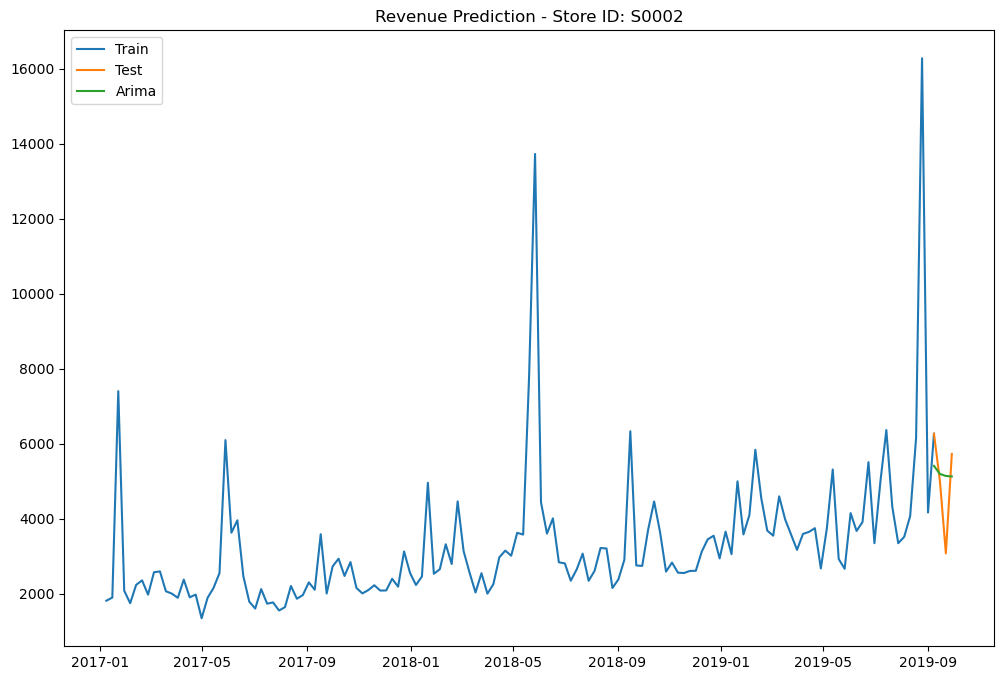

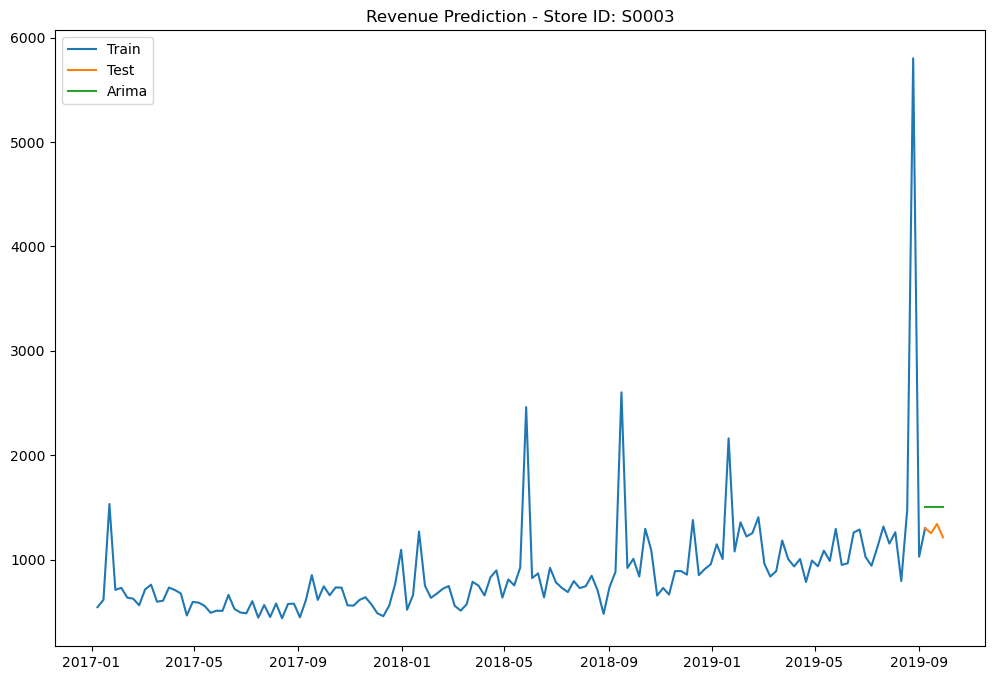

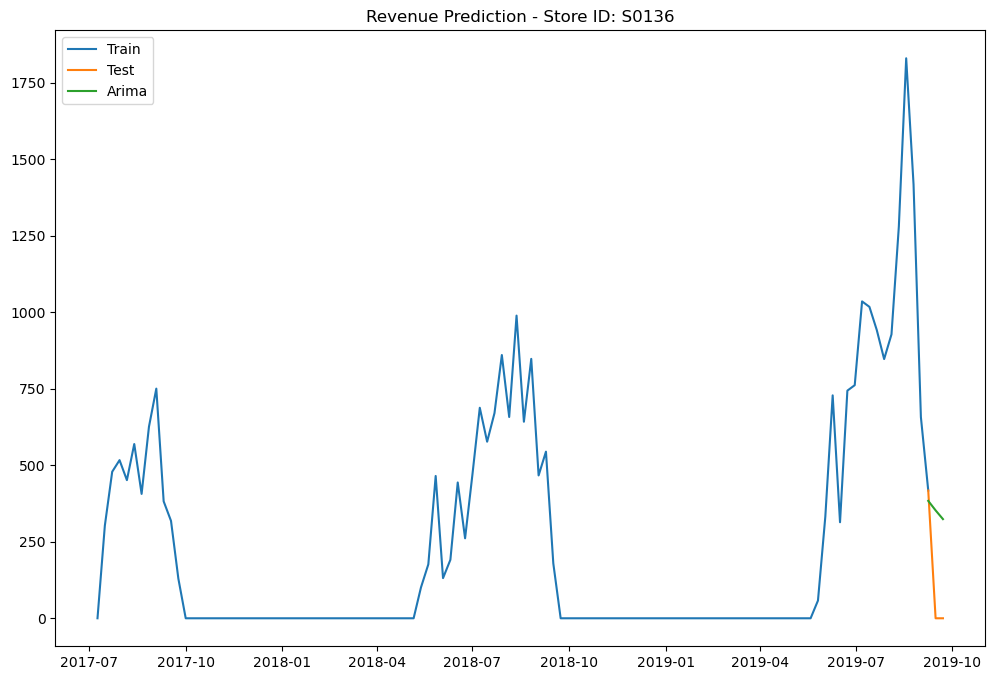

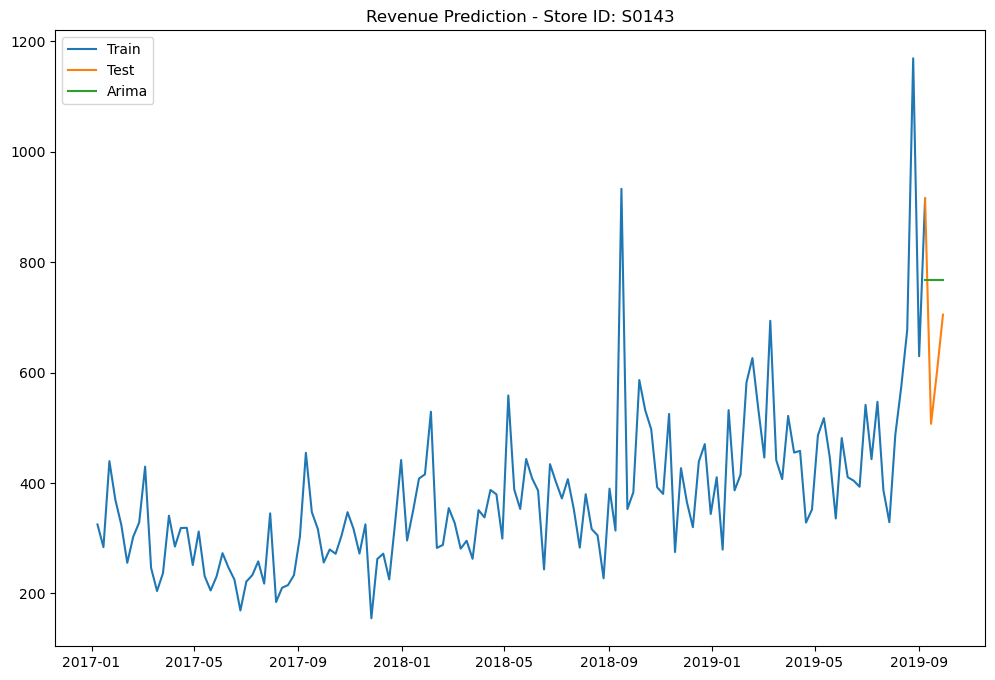

In [117]:
store_ids_plot = ["S0002", "S0003", "S0136", "S0143"]

for store_id in store_ids_plot:
    plt.figure(figsize=(12,8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:,"revenue"], label='Train')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:,"revenue"], label='Test')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:,"arima_revenue"], label='Arima')
    #plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Revenue Prediction - Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [143]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create an empty list to store the RMSE for each store
rmse_per_store_arima = []

for store_id in store_ids:
    # Filter the test data for the specific store ID
    df_test_store = df_test[df_test["store_id"] == store_id]
    df_test_arima_store = df_test_arima[df_test_arima["store_id"] == store_id]
    
    # Ensure consistent lengths
    df_test_store = df_test_store[:len(df_test_arima_store)]
    
    # Calculate the RMSE for the specific store
    rmse = sqrt(mean_squared_error(df_test_arima_store["arima_revenue"], df_test_store["revenue"]))
    
    # Append the RMSE to the list
    rmse_per_store_arima.append((store_id, rmse))

# Print the RMSE for each store
for store_id, rmse in rmse_per_store_arima:
    print(f"Store ID: {store_id}, RMSE_arima: {rmse}")

Store ID: S0002, RMSE_arima: 1162.1619702499002
Store ID: S0003, RMSE_arima: 234.59609683006832
Store ID: S0005, RMSE_arima: 70.89928130441263
Store ID: S0007, RMSE_arima: 180.14529413251466
Store ID: S0010, RMSE_arima: 496.2753473324324
Store ID: S0012, RMSE_arima: 390.8627360445105
Store ID: S0014, RMSE_arima: 180.286285851357
Store ID: S0015, RMSE_arima: 485.9763236155242
Store ID: S0016, RMSE_arima: 130.10901923214823
Store ID: S0020, RMSE_arima: 3218.0097533780017
Store ID: S0022, RMSE_arima: 715.4796723565158
Store ID: S0023, RMSE_arima: 892.3404077957242
Store ID: S0026, RMSE_arima: 3052.6439142123168
Store ID: S0030, RMSE_arima: 158.29517813344518
Store ID: S0032, RMSE_arima: 137.63898743691266
Store ID: S0036, RMSE_arima: 431.8852675300138
Store ID: S0038, RMSE_arima: 2035.6537705435264
Store ID: S0039, RMSE_arima: 197.49780709913708
Store ID: S0040, RMSE_arima: 685.3923285738979
Store ID: S0041, RMSE_arima: 87.78571739876162
Store ID: S0045, RMSE_arima: 126.13851348860611
Sto

In [146]:
rmse_per_store_arima

[('S0002', 1162.1619702499002),
 ('S0003', 234.59609683006832),
 ('S0005', 70.89928130441263),
 ('S0007', 180.14529413251466),
 ('S0010', 496.2753473324324),
 ('S0012', 390.8627360445105),
 ('S0014', 180.286285851357),
 ('S0015', 485.9763236155242),
 ('S0016', 130.10901923214823),
 ('S0020', 3218.0097533780017),
 ('S0022', 715.4796723565158),
 ('S0023', 892.3404077957242),
 ('S0026', 3052.6439142123168),
 ('S0030', 158.29517813344518),
 ('S0032', 137.63898743691266),
 ('S0036', 431.8852675300138),
 ('S0038', 2035.6537705435264),
 ('S0039', 197.49780709913708),
 ('S0040', 685.3923285738979),
 ('S0041', 87.78571739876162),
 ('S0045', 126.13851348860611),
 ('S0046', 188.50788910281642),
 ('S0050', 685.4278858644145),
 ('S0052', 307.0775572619089),
 ('S0055', 261.3963564733671),
 ('S0056', 1182.8745883605116),
 ('S0058', 452.84871145056087),
 ('S0059', 203.2963399836345),
 ('S0061', 797.3114895665431),
 ('S0062', 1189.6798657236188),
 ('S0067', 387.4181248476362),
 ('S0068', 270.6293621487

# Revenue prediction with Arima

In [659]:
revenue["revenue_arima"] = revenue["revenue"]
revenue

,store_id,sales,revenue,revenue_avg,revenue_arima
date,,,,,
2017-01-08,S0002,750.232,1813.24,1813.240000,1813.24
2017-01-15,S0002,871.530,1896.91,1896.910000,1896.91
2017-01-22,S0002,1069.555,7404.16,7404.160000,7404.16
2017-01-29,S0002,910.255,2078.39,2078.390000,2078.39
2017-02-05,S0002,732.754,1745.47,1745.470000,1745.47
...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,369.637095,80.82
2019-10-13,S0143,0.000,0.00,369.637095,0.00
2019-10-20,S0143,0.000,0.00,369.637095,0.00


In [390]:
prediction_arima = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])

for store_id, model in models_arima.items():
    # Get the last date from df_test for the specific store_id
    last_date = df_test[df_test['store_id'] == store_id].index[-1]
    
    # Generate the future dates for prediction
    future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=5, freq='W')

    # Perform the prediction for the future dates
    predicted_values = model.predict(n_periods=5)

    # Create a DataFrame with the predicted values, store_id, and dates
    prediction_store = pd.DataFrame({
        'predicted_revenue': predicted_values,
        'store_id': store_id,
        'date': future_dates
    })
    
    # Append the predictions to the overall prediction DataFrame
    prediction_arima = prediction_arima.append(prediction_store, ignore_index=True)
    
print(prediction_arima)

     predicted_revenue store_id       date
0          5409.512750    S0002 2019-10-06
1          5194.648629    S0002 2019-10-13
2          5140.866315    S0002 2019-10-20
3          5127.404145    S0002 2019-10-27
4          5124.034449    S0002 2019-11-03
..                 ...      ...        ...
310         767.514519    S0143 2019-10-06
311         767.514519    S0143 2019-10-13
312         767.514519    S0143 2019-10-20
313         767.514519    S0143 2019-10-27
314         767.514519    S0143 2019-11-03

[315 rows x 3 columns]


In [431]:
#prediction_arima = prediction_arima.set_index("date")
prediction_arima[prediction_arima["store_id"] == "S0003"]

,predicted_revenue,store_id
date,,
2019-10-06,1508.849735,S0003
2019-10-13,1508.849735,S0003
2019-10-20,1508.849735,S0003
2019-10-27,1508.849735,S0003
2019-11-03,1508.849735,S0003


In [660]:
for idx, row in revenue.iterrows():
    store_id = row['store_id']
    date = idx
    matching_row = prediction_arima[(prediction_arima['store_id'] == store_id) & (prediction_arima.index == pd.Timestamp(date))]
    if not matching_row.empty:
        revenue.loc[(revenue.index == idx) & (revenue['store_id'] == store_id), 'revenue_arima'] = matching_row.loc[matching_row.index[0], 'predicted_revenue']

revenue

,store_id,sales,revenue,revenue_avg,revenue_arima
date,,,,,
2017-01-08,S0002,750.232,1813.24,1813.240000,1813.240000
2017-01-15,S0002,871.530,1896.91,1896.910000,1896.910000
2017-01-22,S0002,1069.555,7404.16,7404.160000,7404.160000
2017-01-29,S0002,910.255,2078.39,2078.390000,2078.390000
2017-02-05,S0002,732.754,1745.47,1745.470000,1745.470000
...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,369.637095,767.514519
2019-10-13,S0143,0.000,0.00,369.637095,767.514519
2019-10-20,S0143,0.000,0.00,369.637095,767.514519


# Now, let's add exogenous variables (Arimax)

1) Month number 
2) Holidays
3) Promotions

In [26]:
sales['promo_discount_2'] = sales['promo_discount_2'].fillna(0)
sales['date'] = pd.to_datetime(sales['date'])
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,0.0,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,0.0,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,0.0,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN
8886055,S0143,P0680,2019-10-31,NaN,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN
8886056,S0143,P0694,2019-10-31,NaN,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN
8886057,S0143,P0718,2019-10-31,NaN,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN


In [27]:
%pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Let's identify whether a certain date is a holiday in Turkey and create a boolean variable with it
import holidays

turkish_holidays = holidays.Turkey()

# Create a new column 'is_holiday' and check if the date is a holiday
sales['is_holiday'] = sales['date'].apply(lambda x: int(x in turkish_holidays))
sales[sales["is_holiday"] == 1]

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,is_holiday
20472,S0002,P0001,2017-04-23,0.0,0.00,1.0,6.50,PR14,NaN,PR03,NaN,0.0,NaN,1
20473,S0002,P0005,2017-04-23,0.0,0.00,10.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN,1
20474,S0002,P0011,2017-04-23,0.0,0.00,4.0,36.00,PR14,NaN,PR03,NaN,0.0,NaN,1
20475,S0002,P0015,2017-04-23,2.0,4.17,5.0,2.85,PR10,low,PR03,NaN,0.0,NaN,1
20476,S0002,P0017,2017-04-23,1.0,1.10,53.0,1.49,PR06,low,PR03,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885919,S0143,P0676,2019-10-29,NaN,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN,1
8885920,S0143,P0680,2019-10-29,NaN,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN,1
8885921,S0143,P0694,2019-10-29,NaN,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN,1
8885922,S0143,P0718,2019-10-29,NaN,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN,1


# Now let's group data by store_id and per week

In [119]:
sales_promo = sales.set_index('date').groupby('store_id')["sales","revenue", "promo_discount_2", "is_holiday"].resample("W").sum()
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82             792.0           0
         2019-10-13     0.000     0.00             264.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0          68

[8610 rows x 4 columns]

In [120]:
# Replace promo_discount_2 values higher than 0 with 1: if there is at least 1 promotion per week and per store, the value is 1 else 0 
sales_promo['promo_discount_2'] = sales_promo['promo_discount_2'].where(sales_promo['promo_discount_2'] <= 0, 1)
sales_promo['is_holiday'] = sales_promo['is_holiday'].where(sales_promo['is_holiday'] <= 0, 1)
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82               1.0           0
         2019-10-13     0.000     0.00               1.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0           1

[8610 rows x 4 columns]

In [121]:
sales_promo = sales_promo.reset_index()
sales_promo['month']=sales_promo["date"].dt.month # add a column with month number
sales_promo

,store_id,date,sales,revenue,promo_discount_2,is_holiday,month
0,S0002,2017-01-08,750.232,1813.24,0.0,0,1
1,S0002,2017-01-15,871.530,1896.91,0.0,0,1
2,S0002,2017-01-22,1069.555,7404.16,0.0,0,1
3,S0002,2017-01-29,910.255,2078.39,0.0,0,1
4,S0002,2017-02-05,732.754,1745.47,0.0,0,2
...,...,...,...,...,...,...,...
8605,S0143,2019-10-06,18.000,80.82,1.0,0,10
8606,S0143,2019-10-13,0.000,0.00,1.0,0,10
8607,S0143,2019-10-20,0.000,0.00,0.0,0,10
8608,S0143,2019-10-27,0.000,0.00,0.0,0,10


In [122]:
sales_promo.set_index("date", inplace = True)

In [123]:
sales_promo

,store_id,sales,revenue,promo_discount_2,is_holiday,month
date,,,,,,
2017-01-08,S0002,750.232,1813.24,0.0,0,1
2017-01-15,S0002,871.530,1896.91,0.0,0,1
2017-01-22,S0002,1069.555,7404.16,0.0,0,1
2017-01-29,S0002,910.255,2078.39,0.0,0,1
2017-02-05,S0002,732.754,1745.47,0.0,0,2
...,...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,1.0,0,10
2019-10-13,S0143,0.000,0.00,1.0,0,10
2019-10-20,S0143,0.000,0.00,0.0,0,10


# Subsetting dataset: 1 month for test

In [124]:
train = sales_promo['2017-01-08' :'2019-09-08']
test = sales_promo['2019-09-08' :'2019-09-29']

In [125]:
test

,store_id,sales,revenue,promo_discount_2,is_holiday,month
date,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,9
2019-09-15,S0002,656.00,5007.57,1.0,0,9
2019-09-22,S0002,525.00,3074.56,1.0,0,9
2019-09-29,S0002,656.16,5728.25,1.0,0,9
2019-09-08,S0003,227.00,1302.61,1.0,0,9
...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9
2019-09-08,S0143,104.00,915.27,1.0,0,9
2019-09-15,S0143,63.00,507.08,1.0,0,9


# Third model - Arimax

In [248]:
# Apply auto_arima for each store ID with exogenous variables

# Get unique store IDs
store_ids = sales['store_id'].unique()

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
models_arimax = {}
best_params_arimax = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    exog_train_store = sales_promo.loc[df_train_store.index, ['promo_discount_2', 'is_holiday', 'month']]
    exog_test_store = sales_promo.loc[df_test_store.index, ['promo_discount_2','is_holiday', 'month']]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       exogenous=exog_train_store,
                       seasonal=False, # no seasonality for standard ARIMA
                       trace=True, # logs
                       suppress_warnings=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"], exogenous=exog_train_store)
    
    # Save the model for the specific store
    models_arimax[store_id] = model
    
    # Store the best parameters for the specific store
    best_params_arimax[store_id] = model.get_params()
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods=len(df_test_store), exogenous=exog_test_store), 
                                    columns=["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arimax_revenue"] = prediction["predicted_revenue"]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2665.635, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2644.265, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2629.542, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2663.643, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2630.585, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2627.605, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2621.103, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2642.272, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2621.504, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2628.568, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2625.295, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2634.7

In [251]:
models_arimax

{'S0002': ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0003': ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0005': ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True),
 'S0007': ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True),
 'S0010': ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True),
 'S0012': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0014': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0015': ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0016': ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'S0020': ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True),
 'S0022': ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True),
 

In [167]:
prediction_arimax = prediction.copy()
df_test_arimax = df_test.copy()
df_test_arimax

,store_id,sales,revenue,promo_discount_2,is_holiday,month,arimax_revenue
2019-09-08,S0002,598.00,6267.91,1.0,0,9,5409.512750
2019-09-15,S0002,656.00,5007.57,1.0,0,9,5194.648629
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5140.866315
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5127.404145
2019-09-08,S0003,227.00,1302.61,1.0,0,9,1334.551619
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2040.463420
2019-09-08,S0143,104.00,915.27,1.0,0,9,767.514519
2019-09-15,S0143,63.00,507.08,1.0,0,9,767.514519
2019-09-22,S0143,89.00,601.63,1.0,0,9,767.514519


In [168]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create an empty list to store the RMSE for each store
rmse_per_store_arimax = []

for store_id in store_ids:
    # Filter the test data for the specific store ID
    df_test_store = df_test[df_test["store_id"] == store_id]
    df_test_arimax_store = df_test_arimax[df_test_arimax["store_id"] == store_id]
    
    # Ensure consistent lengths
    df_test_store = df_test_store[:len(df_test_arimax_store)]
    
    # Calculate the RMSE for the specific store
    rmse = sqrt(mean_squared_error(df_test_arimax_store["arimax_revenue"], df_test_store["revenue"]))
    
    # Append the RMSE to the list
    rmse_per_store_arimax.append((store_id, rmse))

# Print the RMSE for each store
for store_id, rmse in rmse_per_store_arimax:
    print(f"Store ID: {store_id}, RMSE_arimax: {rmse}")

Store ID: S0002, RMSE_arimax: 1162.1619702499002
Store ID: S0003, RMSE_arimax: 91.9170712264983
Store ID: S0005, RMSE_arimax: 70.89928130441263
Store ID: S0007, RMSE_arimax: 179.35010722718124
Store ID: S0010, RMSE_arimax: 639.5462003856311
Store ID: S0012, RMSE_arimax: 390.8627360445105
Store ID: S0014, RMSE_arimax: 151.91106889588661
Store ID: S0015, RMSE_arimax: 485.9763236155242
Store ID: S0016, RMSE_arimax: 130.10901923214823
Store ID: S0020, RMSE_arimax: 3218.0097533780017
Store ID: S0022, RMSE_arimax: 293.15447756654174
Store ID: S0023, RMSE_arimax: 907.5738338715943
Store ID: S0026, RMSE_arimax: 3052.6439142123168
Store ID: S0030, RMSE_arimax: 149.9987796828905
Store ID: S0032, RMSE_arimax: 137.63898743691266
Store ID: S0036, RMSE_arimax: 615.9856522558586
Store ID: S0038, RMSE_arimax: 2035.6537705435264
Store ID: S0039, RMSE_arimax: 190.31051754212152
Store ID: S0040, RMSE_arimax: 685.3923285738979
Store ID: S0041, RMSE_arimax: 94.09647584158314
Store ID: S0045, RMSE_arimax: 1

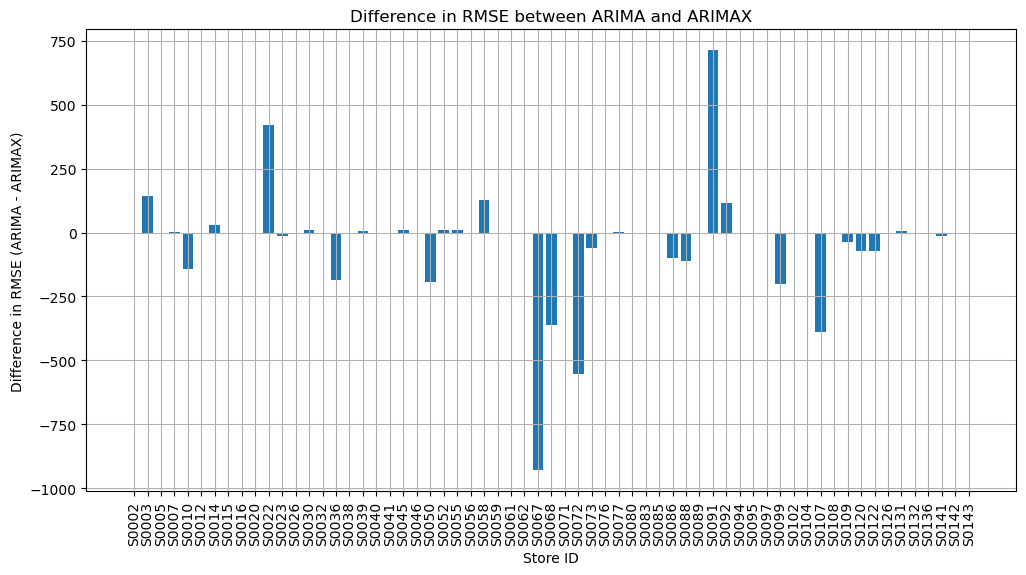

In [169]:
# Extract the store IDs and RMSE values from the dictionaries
store_ids = [entry[0] for entry in rmse_per_store_arima]
rmse_arima = [entry[1] for entry in rmse_per_store_arima]
rmse_arimax = [entry[1] for entry in rmse_per_store_arimax]

# Calculate the difference between the RMSE values
difference = np.subtract(rmse_arima, rmse_arimax)

# Create a bar plot to visualize the difference
plt.figure(figsize=(12, 6))
plt.bar(store_ids, difference)
plt.xlabel('Store ID')
plt.ylabel('Difference in RMSE (ARIMA - ARIMAX)')
plt.title('Difference in RMSE between ARIMA and ARIMAX')
plt.xticks(rotation=90)
plt.grid()
plt.show()

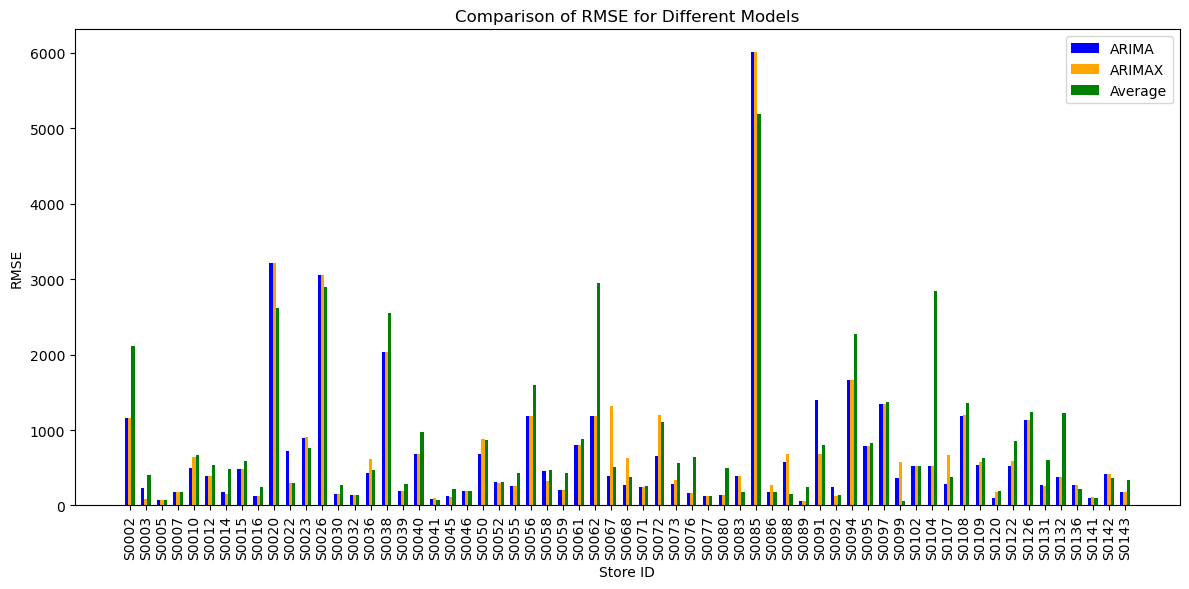

In [170]:
# Extract the store IDs and RMSE values for each model
store_ids = [entry[0] for entry in rmse_per_store_arima]
rmse_arima = [entry[1] for entry in rmse_per_store_arima]
rmse_arimax = [entry[1] for entry in rmse_per_store_arimax]
rmse_avg = [entry[1] for entry in rmse_per_store_avg]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(store_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create a grouped bar plot to compare the RMSE values
plt.figure(figsize=(12, 6))
plt.bar(r1, rmse_arima, color='blue', width=bar_width, label='ARIMA')
plt.bar(r2, rmse_arimax, color='orange', width=bar_width, label='ARIMAX')
plt.bar(r3, rmse_avg, color='green', width=bar_width, label='Average')

# Add labels and title to the plot
plt.xlabel('Store ID')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.xticks([r + bar_width for r in range(len(store_ids))], store_ids, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

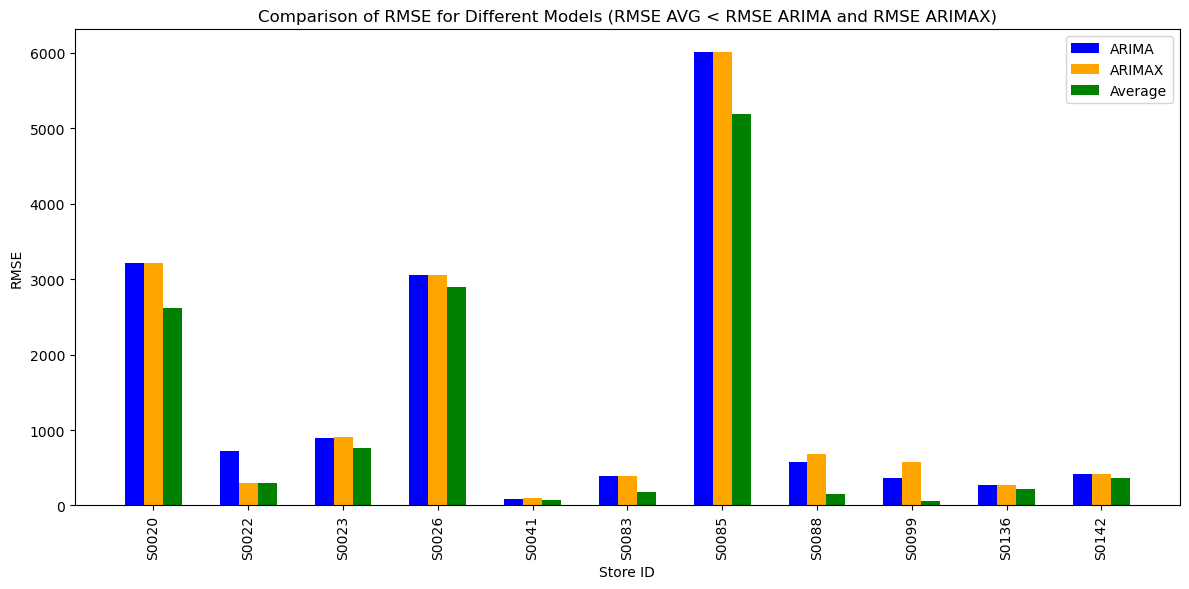

In [171]:

# Extract the store IDs and RMSE values for each model
store_ids = [entry[0] for entry in rmse_per_store_arima]
rmse_arima = [entry[1] for entry in rmse_per_store_arima]
rmse_arimax = [entry[1] for entry in rmse_per_store_arimax]
rmse_avg = [entry[1] for entry in rmse_per_store_avg]

# Filter the data where RMSE AVG is lower than RMSE ARIMA and RMSE ARIMAX
filtered_ids = []
filtered_arima = []
filtered_arimax = []
filtered_avg = []

for i in range(len(store_ids)):
    if rmse_avg[i] < rmse_arima[i] and rmse_avg[i] < rmse_arimax[i]:
        filtered_ids.append(store_ids[i])
        filtered_arima.append(rmse_arima[i])
        filtered_arimax.append(rmse_arimax[i])
        filtered_avg.append(rmse_avg[i])

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(filtered_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create a grouped bar plot to compare the RMSE values
plt.figure(figsize=(12, 6))
plt.bar(r1, filtered_arima, color='blue', width=bar_width, label='ARIMA')
plt.bar(r2, filtered_arimax, color='orange', width=bar_width, label='ARIMAX')
plt.bar(r3, filtered_avg, color='green', width=bar_width, label='Average')

# Add labels and title to the plot
plt.xlabel('Store ID')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models (RMSE AVG < RMSE ARIMA and RMSE ARIMAX)')
plt.xticks([r + bar_width for r in range(len(filtered_ids))], filtered_ids, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [661]:
revenue["revenue_arimax"] = revenue["revenue"]
revenue

,store_id,sales,revenue,revenue_avg,revenue_arima,revenue_arimax
date,,,,,,
2017-01-08,S0002,750.232,1813.24,1813.240000,1813.240000,1813.24
2017-01-15,S0002,871.530,1896.91,1896.910000,1896.910000,1896.91
2017-01-22,S0002,1069.555,7404.16,7404.160000,7404.160000,7404.16
2017-01-29,S0002,910.255,2078.39,2078.390000,2078.390000,2078.39
2017-02-05,S0002,732.754,1745.47,1745.470000,1745.470000,1745.47
...,...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,369.637095,767.514519,80.82
2019-10-13,S0143,0.000,0.00,369.637095,767.514519,0.00
2019-10-20,S0143,0.000,0.00,369.637095,767.514519,0.00


In [437]:
prediction_arimax = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])

for store_id, model in models_arimax.items():
    # Get the last date from df_test for the specific store_id
    last_date = df_test[df_test['store_id'] == store_id].index[-1]
    
    # Generate the future dates for prediction
    future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=5, freq='W')

    # Perform the prediction for the future dates
    predicted_values = model.predict(n_periods=5)

    # Create a DataFrame with the predicted values, store_id, and dates
    prediction_store = pd.DataFrame({
        'predicted_revenue': predicted_values,
        'store_id': store_id,
        'date': future_dates
    })
    
    # Append the predictions to the overall prediction DataFrame
    prediction_arimax = prediction_arimax.append(prediction_store, ignore_index=True)
    
print(prediction_arimax)

     predicted_revenue store_id       date
0          5409.512750    S0002 2019-10-06
1          5194.648629    S0002 2019-10-13
2          5140.866315    S0002 2019-10-20
3          5127.404145    S0002 2019-10-27
4          5124.034449    S0002 2019-11-03
..                 ...      ...        ...
310         767.514519    S0143 2019-10-06
311         767.514519    S0143 2019-10-13
312         767.514519    S0143 2019-10-20
313         767.514519    S0143 2019-10-27
314         767.514519    S0143 2019-11-03

[315 rows x 3 columns]


In [442]:
prediction_arimax = prediction_arimax.set_index("date")

In [665]:
prediction_arimax[prediction_arimax["store_id"] == "S0003"]

,predicted_revenue,store_id
date,,
2019-10-06,1334.551619,S0003
2019-10-13,1346.851851,S0003
2019-10-20,1359.057469,S0003
2019-10-27,1371.169200,S0003
2019-11-03,1383.187766,S0003


In [663]:
for idx, row in revenue.iterrows():
    store_id = row['store_id']
    date = idx
    matching_row = prediction_arimax[(prediction_arimax['store_id'] == store_id) & (prediction_arimax.index == pd.Timestamp(date))]
    if not matching_row.empty:
        revenue.loc[(revenue.index == idx) & (revenue['store_id'] == store_id), 'revenue_arimax'] = matching_row.loc[matching_row.index[0], 'predicted_revenue']

,store_id,sales,revenue,revenue_avg,revenue_arima,revenue_arimax
date,,,,,,
2017-01-08,S0002,750.232,1813.24,1813.24000,1813.240000,1813.240000
2017-01-15,S0002,871.530,1896.91,1896.91000,1896.910000,1896.910000
2017-01-22,S0002,1069.555,7404.16,7404.16000,7404.160000,7404.160000
2017-01-29,S0002,910.255,2078.39,2078.39000,2078.390000,2078.390000
2017-02-05,S0002,732.754,1745.47,1745.47000,1745.470000,1745.470000
...,...,...,...,...,...,...
2019-10-06,S0002,57.000,363.20,3208.24777,5409.512750,5409.512750
2019-10-13,S0002,0.000,0.00,3208.24777,5194.648629,5194.648629
2019-10-20,S0002,0.000,0.00,3208.24777,5140.866315,5140.866315


In [666]:
revenue[revenue["store_id"] == "S0003"]

,store_id,sales,revenue,revenue_avg,revenue_arima,revenue_arimax
date,,,,,,
2017-01-08,S0003,264.67,546.47,546.470000,546.470000,546.470000
2017-01-15,S0003,325.52,616.72,616.720000,616.720000,616.720000
2017-01-22,S0003,309.00,1534.22,1534.220000,1534.220000,1534.220000
2017-01-29,S0003,302.71,712.18,712.180000,712.180000,712.180000
2017-02-05,S0003,283.60,731.45,731.450000,731.450000,731.450000
...,...,...,...,...,...,...
2019-10-06,S0003,27.00,102.82,858.016284,1508.849735,1334.551619
2019-10-13,S0003,0.00,0.00,858.016284,1508.849735,1346.851851
2019-10-20,S0003,0.00,0.00,858.016284,1508.849735,1359.057469


# Fourth model - SARIMAX 

In [189]:
# Get unique store IDs
store_ids = sales['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

In [255]:
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []
models_sarimax = {}
best_params_sarimax = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    exog_train_store = sales_promo.loc[df_train_store.index, ['promo_discount_2', 'is_holiday', 'month']]
    exog_test_store = sales_promo.loc[df_test_store.index, ['promo_discount_2','is_holiday', 'month']]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store to find the best parameters
    model = auto_arima(df_store["revenue"], 
                       exogenous=exog_train_store,
                       seasonal=True,
                       m=52,  # is the frequency of the cycle 
                       D = 1,
                       trace=True, 
                       suppress_warnings=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    # Save the model for the specific store
    models_sarimax[store_id] = model
    
    # Store the best parameters for the specific store
    best_params_sarimax[store_id] = model.get_params()
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store), exogenous=exog_test_store), 
                                    columns = ["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    # Append the predictions to the prediction DataFrame
    prediction = prediction.append(prediction_store)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[52] intercept   : AIC=inf, Time=8.48 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1777.070, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1757.101, Time=0.94 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1783.733, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1764.018, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=11.79 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=13.14 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1769.581, Time=1.64 sec
 ARIMA(2,0,0)(1,1,0)[52] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=1756.390, Time=1.44 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1766.000, Time=0.23 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC=1747.662,

In [257]:
models_sarimax

{'S0002': ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(2, 1, 0, 52),
       suppress_warnings=True),
 'S0003': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0010': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 52),
       suppress_warnings=True),
 'S0012': ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 52),
       suppress_warnings=True),
 'S0014': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0015': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0016': ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True, with_intercept=False),
 'S0020': ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0022': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
  

In [187]:
prediction_sarima = prediction.copy()
df_test_sarimax = df_test[~df_test['store_id'].isin(insufficient_data_stores)]
df_test_sarimax["sarimax_revenue"] = prediction_sarima["predicted_revenue"].values
df_test_sarimax

,store_id,sales,revenue,promo_discount_2,is_holiday,month,sarimax_revenue
2019-09-08,S0002,598.00,6267.91,1.0,0,9,6389.588606
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4839.284421
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5133.821161
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5238.150516
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2384.743350
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2037.519292
2019-09-08,S0143,104.00,915.27,1.0,0,9,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,632.808537
2019-09-22,S0143,89.00,601.63,1.0,0,9,547.235761


In [45]:
models

{'S0002': ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(2, 1, 0, 52),
       suppress_warnings=True),
 'S0003': ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 52),
       suppress_warnings=True),
 'S0010': ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0012': ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0014': ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True, with_intercept=False),
 'S0015': ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0016': ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True, with_intercept=False),
 'S0020': ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
       suppress_warnings=True),
 'S0022': ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_o

In [201]:
df_test["store_id"][~df_test['store_id'].isin(insufficient_data_stores)].unique()

array(['S0002', 'S0003', 'S0010', 'S0012', 'S0014', 'S0015', 'S0016',
       'S0020', 'S0022', 'S0023', 'S0026', 'S0030', 'S0032', 'S0038',
       'S0039', 'S0040', 'S0041', 'S0045', 'S0050', 'S0052', 'S0055',
       'S0056', 'S0058', 'S0059', 'S0062', 'S0067', 'S0068', 'S0072',
       'S0073', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0094', 'S0095', 'S0097', 'S0099', 'S0102',
       'S0104', 'S0107', 'S0108', 'S0120', 'S0122', 'S0126', 'S0131',
       'S0132', 'S0136', 'S0141', 'S0142', 'S0143'], dtype=object)

In [196]:
df_test_sarimax

,store_id,sales,revenue,promo_discount_2,is_holiday,month,sarimax_revenue
2019-09-08,S0002,598.00,6267.91,1.0,0,9,6389.588606
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4839.284421
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5133.821161
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5238.150516
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2384.743350
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2037.519292
2019-09-08,S0143,104.00,915.27,1.0,0,9,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,632.808537
2019-09-22,S0143,89.00,601.63,1.0,0,9,547.235761


In [208]:
insufficient_data_stores

['S0005',
 'S0007',
 'S0036',
 'S0046',
 'S0061',
 'S0071',
 'S0076',
 'S0092',
 'S0109']

In [207]:
# Get unique store IDs
store_ids_original  = sales['store_id'].unique()
store_ids_original

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

In [213]:
# Create an empty list to store the RMSE for each store
rmse_per_store_sarimax = []

for store_id in store_ids_original:
    # Filter the test data for the specific store ID
    df_test_store = df_test[df_test["store_id"] == store_id]
    df_test_sarimax_store = df_test_sarimax[df_test_sarimax["store_id"] == store_id]
    
    # Ensure consistent lengths
    df_test_store = df_test_store[:len(df_test_sarimax_store)]
    
    if store_id in insufficient_data_stores:
        rmse_per_store_sarimax.append((store_id, 0))
    else:
        rmse = sqrt(mean_squared_error(df_test_sarimax_store["sarimax_revenue"], df_test_store["revenue"]))
        rmse_per_store_sarimax.append((store_id, rmse))

# Print the RMSE for each store
for store_id, rmse in rmse_per_store_sarimax:
    print(f"Store ID: {store_id}, RMSE_sarimax: {rmse}")

Store ID: S0002, RMSE_sarimax: 1063.4707040071287
Store ID: S0003, RMSE_sarimax: 541.1551670631759
Store ID: S0005, RMSE_sarimax: 0
Store ID: S0007, RMSE_sarimax: 0
Store ID: S0010, RMSE_sarimax: 469.5843163222832
Store ID: S0012, RMSE_sarimax: 528.3325997818786
Store ID: S0014, RMSE_sarimax: 151.67221079089322
Store ID: S0015, RMSE_sarimax: 451.85960200195075
Store ID: S0016, RMSE_sarimax: 348.01849301997123
Store ID: S0020, RMSE_sarimax: 1614.600025477926
Store ID: S0022, RMSE_sarimax: 452.3594153917369
Store ID: S0023, RMSE_sarimax: 1284.3014875550134
Store ID: S0026, RMSE_sarimax: 1554.786526126085
Store ID: S0030, RMSE_sarimax: 230.7579777368977
Store ID: S0032, RMSE_sarimax: 299.47152532871837
Store ID: S0036, RMSE_sarimax: 0
Store ID: S0038, RMSE_sarimax: 2879.355163922612
Store ID: S0039, RMSE_sarimax: 204.552136435893
Store ID: S0040, RMSE_sarimax: 2575.3937459513522
Store ID: S0041, RMSE_sarimax: 54.480307419230755
Store ID: S0045, RMSE_sarimax: 324.80285292117634
Store ID: S

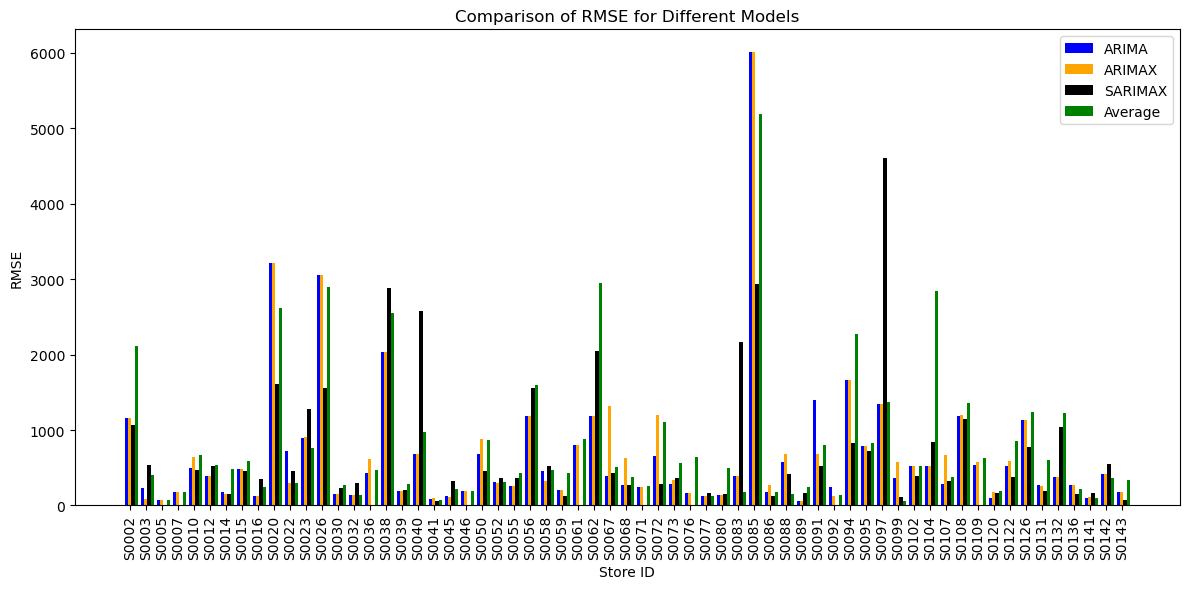

In [220]:
# Extract the store IDs and RMSE values for each model
store_ids = [entry[0] for entry in rmse_per_store_arima]
rmse_arima = [entry[1] for entry in rmse_per_store_arima]
rmse_arimax = [entry[1] for entry in rmse_per_store_arimax]
rmse_sarimax = [entry[1] for entry in rmse_per_store_sarimax]
rmse_avg = [entry[1] for entry in rmse_per_store_avg]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(store_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create a grouped bar plot to compare the RMSE values
plt.figure(figsize=(12, 6))
plt.bar(r1, rmse_arima, color='blue', width=bar_width, label='ARIMA')
plt.bar(r2, rmse_arimax, color='orange', width=bar_width, label='ARIMAX')
plt.bar(r3, rmse_sarimax, color='black', width=bar_width, label='SARIMAX')
plt.bar(r4, rmse_avg, color='green', width=bar_width, label='Average')

# Add labels and title to the plot
plt.xlabel('Store ID')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.xticks([r + bar_width for r in range(len(store_ids))], store_ids, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

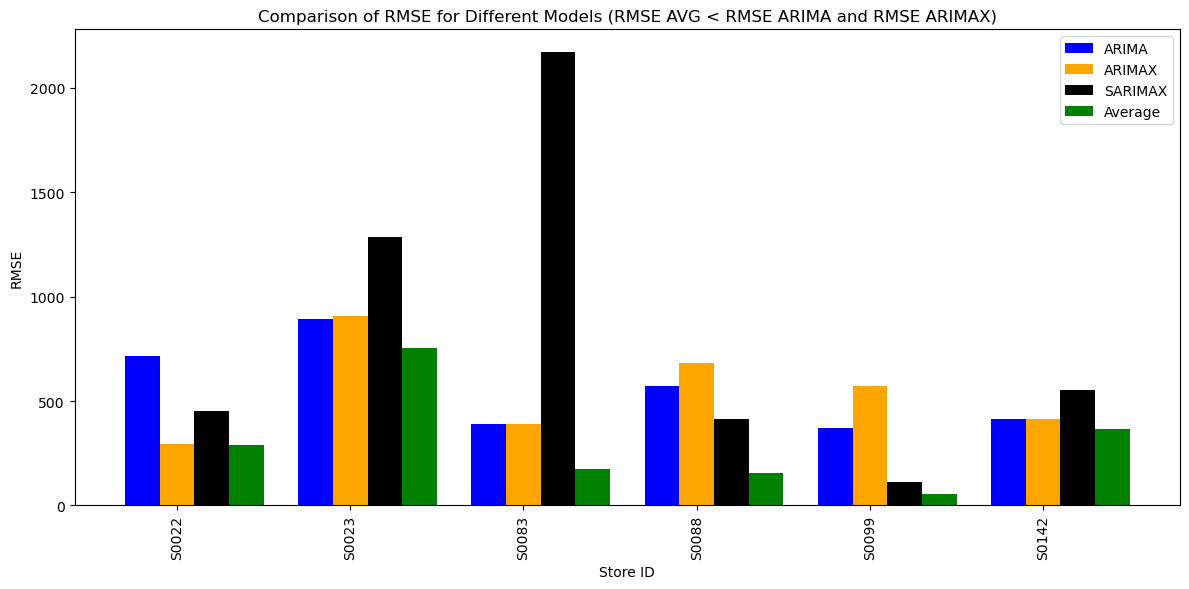

In [223]:
# Extract the store IDs and RMSE values for each model
store_ids = [entry[0] for entry in rmse_per_store_arima]
rmse_arima = [entry[1] for entry in rmse_per_store_arima]
rmse_arimax = [entry[1] for entry in rmse_per_store_arimax]
rmse_sarimax = [entry[1] for entry in rmse_per_store_sarimax]
rmse_avg = [entry[1] for entry in rmse_per_store_avg]

# Filter the data where RMSE AVG is lower than RMSE ARIMA and RMSE ARIMAX
filtered_ids = []
filtered_arima = []
filtered_arimax = []
filtered_sarimax = []
filtered_avg = []

for i in range(len(store_ids)):
    if rmse_avg[i] < rmse_arima[i] and rmse_avg[i] < rmse_arimax[i] and rmse_avg[i] < rmse_sarimax[i]:
        filtered_ids.append(store_ids[i])
        filtered_arima.append(rmse_arima[i])
        filtered_arimax.append(rmse_arimax[i])
        filtered_sarimax.append(rmse_sarimax[i])
        filtered_avg.append(rmse_avg[i])

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(filtered_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create a grouped bar plot to compare the RMSE values
plt.figure(figsize=(12, 6))
plt.bar(r1, filtered_arima, color='blue', width=bar_width, label='ARIMA')
plt.bar(r2, filtered_arimax, color='orange', width=bar_width, label='ARIMAX')
plt.bar(r3, filtered_sarimax, color='black', width=bar_width, label='SARIMAX')
plt.bar(r4, filtered_avg, color='green', width=bar_width, label='Average')

# Add labels and title to the plot
plt.xlabel('Store ID')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models (RMSE AVG < RMSE ARIMA and RMSE ARIMAX)')
plt.xticks([r + bar_width for r in range(len(filtered_ids))], filtered_ids, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [246]:
rmse_avg = pd.DataFrame(rmse_per_store_avg, columns = ["store_id", "avg"])
rmse_arima = pd.DataFrame(rmse_per_store_arima, columns = ["store_id", "arima"])
rmse_arimax = pd.DataFrame(rmse_per_store_arimax, columns = ["store_id", "arimax"])
rmse_sarimax = pd.DataFrame(rmse_per_store_sarimax, columns = ["store_id", "sarimax"])

rmse = rmse_avg
rmse["arima"] = rmse_arima["arima"]
rmse["arimax"] = rmse_arimax["arimax"]
rmse["sarimax"] = rmse_sarimax["sarimax"]
rmse

,store_id,avg,arima,arimax,sarimax
0,S0002,2109.787818,1162.161970,1162.161970,1063.470704
1,S0003,403.031875,234.596097,91.917071,541.155167
2,S0005,74.617590,70.899281,70.899281,0.000000
3,S0007,180.145294,180.145294,179.350107,0.000000
4,S0010,666.021883,496.275347,639.546200,469.584316
...,...,...,...,...,...
58,S0132,1219.579924,383.091664,383.091664,1040.708459
59,S0136,222.141927,277.199745,277.199745,150.615490
60,S0141,100.754479,99.651831,112.213468,159.367933
61,S0142,365.511585,415.882527,415.882527,553.974500


In [261]:
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])

for store_id, model in models_sarimax.items():
    # Get the last date from df_test for the specific store_id
    last_date = df_test[df_test['store_id'] == store_id].index[-1]
    
    # Generate the future dates for prediction
    future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=5, freq='W')

    # Perform the prediction for the future dates
    predicted_values = model.predict(n_periods=5)

    # Create a DataFrame with the predicted values, store_id, and dates
    prediction_store = pd.DataFrame({
        'predicted_revenue': predicted_values,
        'store_id': store_id,
        'date': future_dates
    })
    
    # Append the predictions to the overall prediction DataFrame
    prediction = prediction.append(prediction_store, ignore_index=True)
    
print(prediction)

     predicted_revenue store_id       date
0          6389.588606    S0002 2019-10-06
1          4839.284421    S0002 2019-10-13
2          5133.821161    S0002 2019-10-20
3          5238.150516    S0002 2019-10-27
4          5007.187034    S0002 2019-11-03
..                 ...      ...        ...
265         955.522650    S0143 2019-10-06
266         632.808537    S0143 2019-10-13
267         547.235761    S0143 2019-10-20
268         675.682788    S0143 2019-10-27
269         616.124146    S0143 2019-11-03

[270 rows x 3 columns]


In [262]:
prediction_sarimax = prediction.set_index("date")

In [263]:
prediction_sarimax

,predicted_revenue,store_id
date,,
2019-10-06,6389.588606,S0002
2019-10-13,4839.284421,S0002
2019-10-20,5133.821161,S0002
2019-10-27,5238.150516,S0002
2019-11-03,5007.187034,S0002
...,...,...
2019-10-06,955.522650,S0143
2019-10-13,632.808537,S0143
2019-10-20,547.235761,S0143


In [667]:
revenue["revenue_sarimax"] = revenue["revenue"]

In [668]:
for idx, row in revenue.iterrows():
    store_id = row['store_id']
    date = idx
    matching_row = prediction_sarimax[(prediction_sarimax['store_id'] == store_id) & (prediction_sarimax.index == pd.Timestamp(date))]
    if not matching_row.empty:
        revenue.loc[(revenue.index == idx) & (revenue['store_id'] == store_id), 'revenue_sarimax'] = matching_row.loc[matching_row.index[0], 'predicted_revenue']

In [670]:
revenue[revenue["store_id"] == "S0003"]

,store_id,sales,revenue,revenue_avg,revenue_arima,revenue_arimax,revenue_sarimax
date,,,,,,,
2017-01-08,S0003,264.67,546.47,546.470000,546.470000,546.470000,546.470000
2017-01-15,S0003,325.52,616.72,616.720000,616.720000,616.720000,616.720000
2017-01-22,S0003,309.00,1534.22,1534.220000,1534.220000,1534.220000,1534.220000
2017-01-29,S0003,302.71,712.18,712.180000,712.180000,712.180000,712.180000
2017-02-05,S0003,283.60,731.45,731.450000,731.450000,731.450000,731.450000
...,...,...,...,...,...,...,...
2019-10-06,S0003,27.00,102.82,858.016284,1508.849735,1334.551619,2384.743350
2019-10-13,S0003,0.00,0.00,858.016284,1508.849735,1346.851851,1259.219510
2019-10-20,S0003,0.00,0.00,858.016284,1508.849735,1359.057469,1359.938933


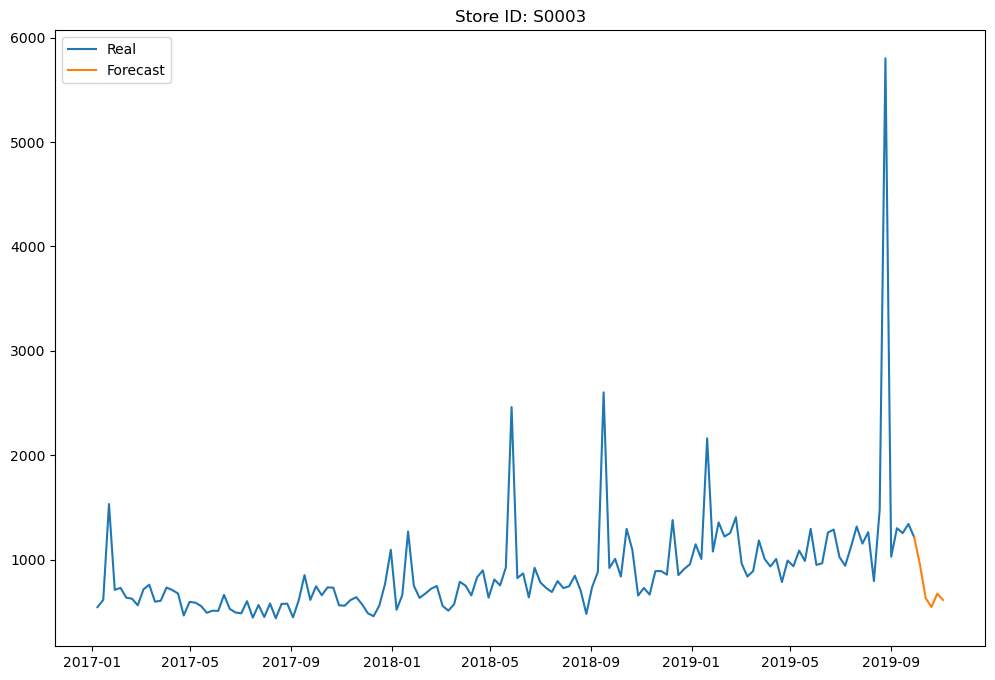

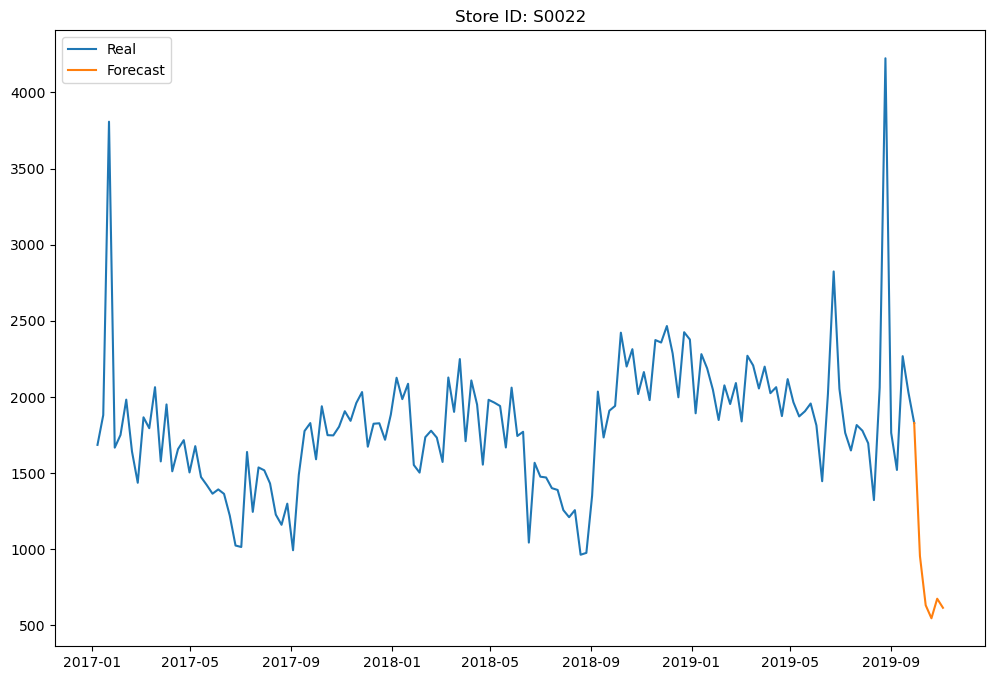

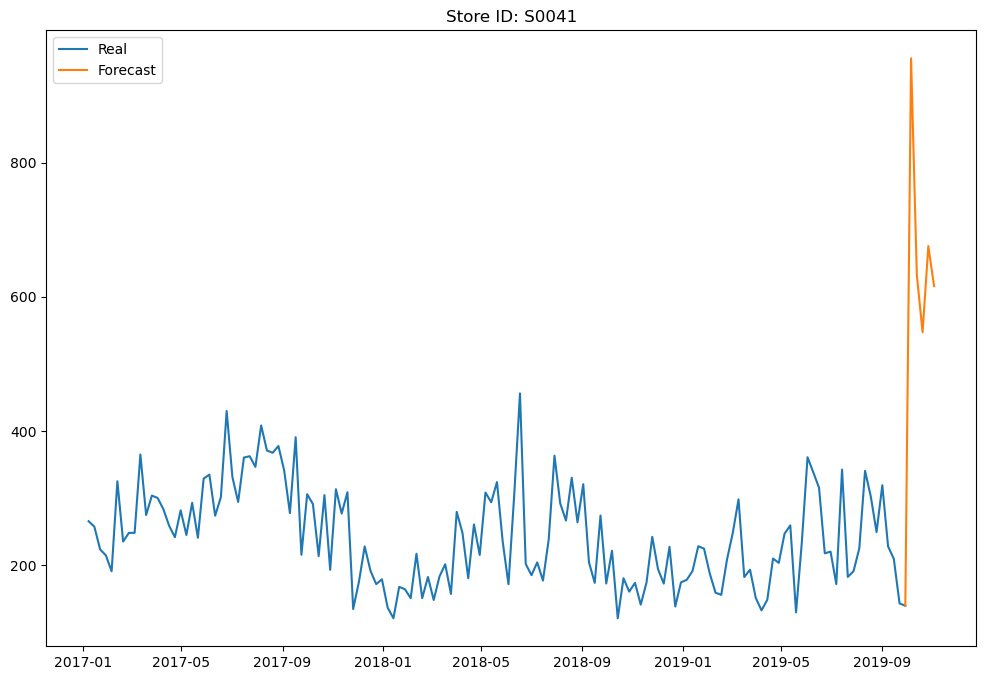

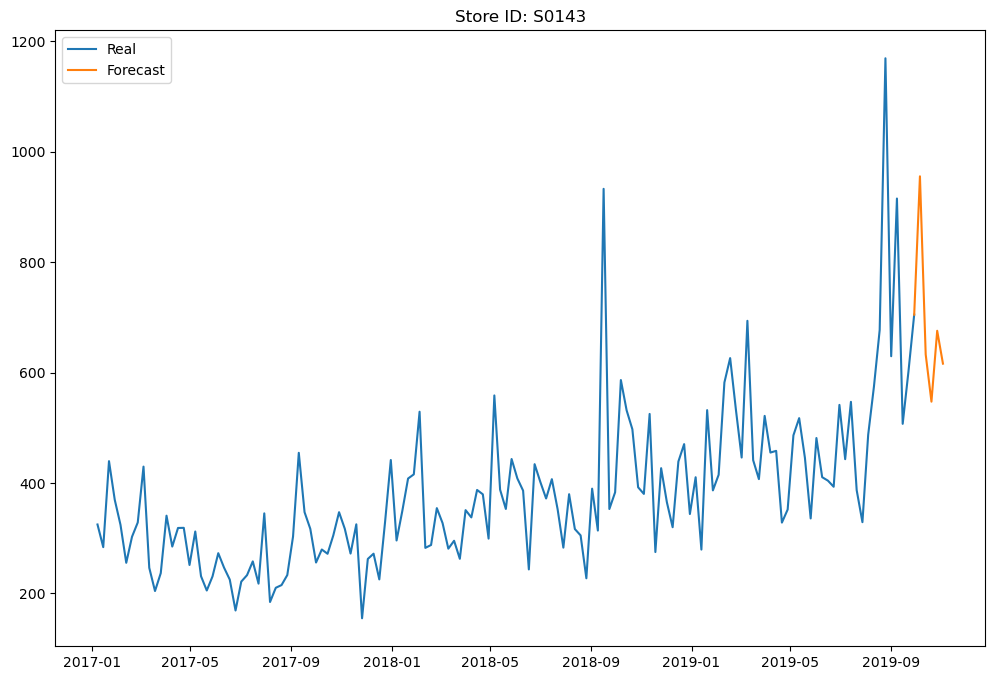

In [106]:
store_ids = ["S0003", "S0022","S0041", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(sales_grouped_v2[(sales_grouped_v2["store_id"] == store_id) & ("2017-01-08" <= sales_grouped_v2.index) & (sales_grouped_v2.index <= "2019-09-29")]["revenue"], label='Real')
    plt.plot(sales_grouped_v2[(sales_grouped_v2["store_id"] == store_id) & (sales_grouped_v2.index >= "2019-09-29")]["revenue"], label='Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [54]:
prediction_sarima = prediction.copy()

In [55]:
df_test_sarima = test[~test['store_id'].isin(insufficient_data_stores)]
df_test_sarima["Sarima"] = prediction_sarima["predicted_revenue"].values
df_test_sarima

,store_id,sales,revenue,promo_discount_2,is_holiday,month,Sarima
date,,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,9,6660.645955
2019-09-15,S0002,656.00,5007.57,1.0,0,9,5241.319668
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5419.069972
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5458.196527
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2388.252187
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2039.099706
2019-09-08,S0143,104.00,915.27,1.0,0,9,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,632.808537


In [302]:
df_test["arima"] = df_test_arima["arima_revenue"]
df_test["difference"] = df_test["arima"] - df_test["arimax_revenue"]
df_test[df_test["difference"] != 0]

,store_id,sales,revenue,promo_discount_2,is_holiday,month,arimax_revenue,arima,difference


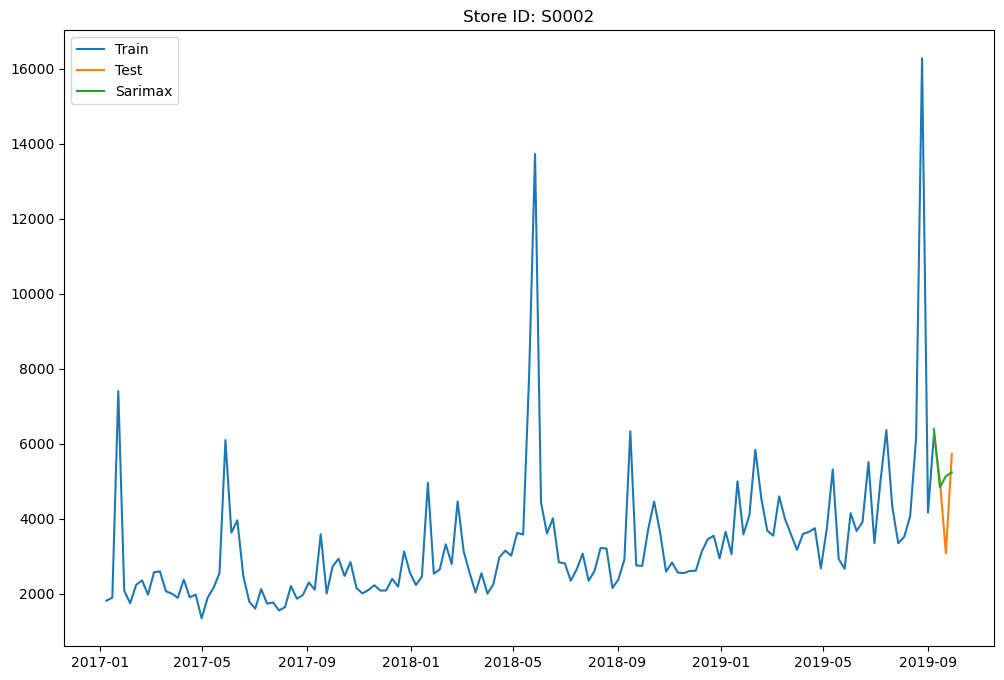

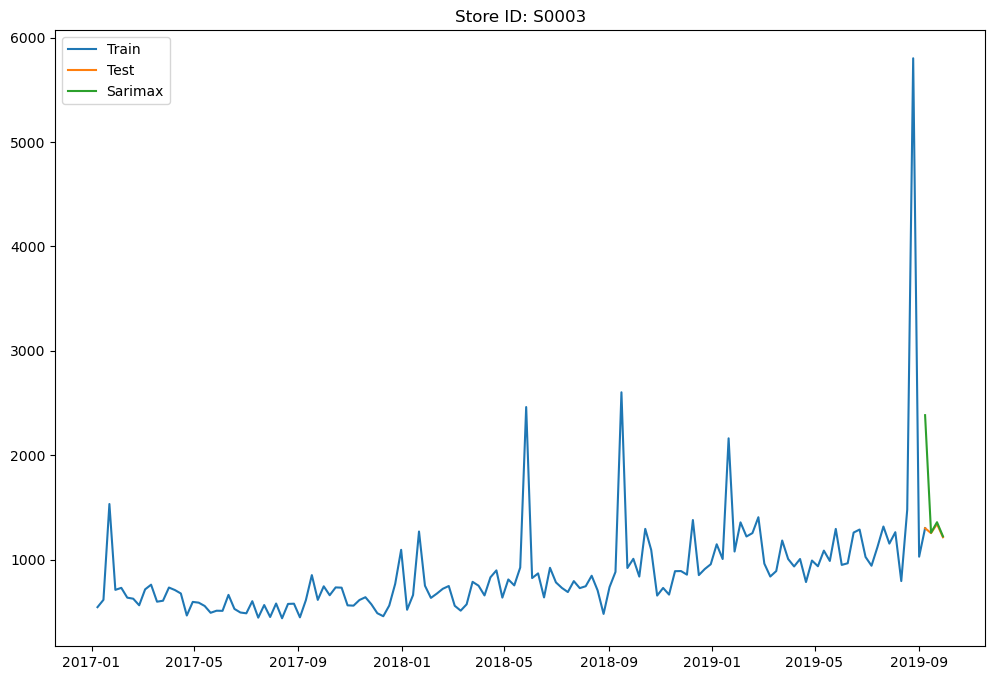

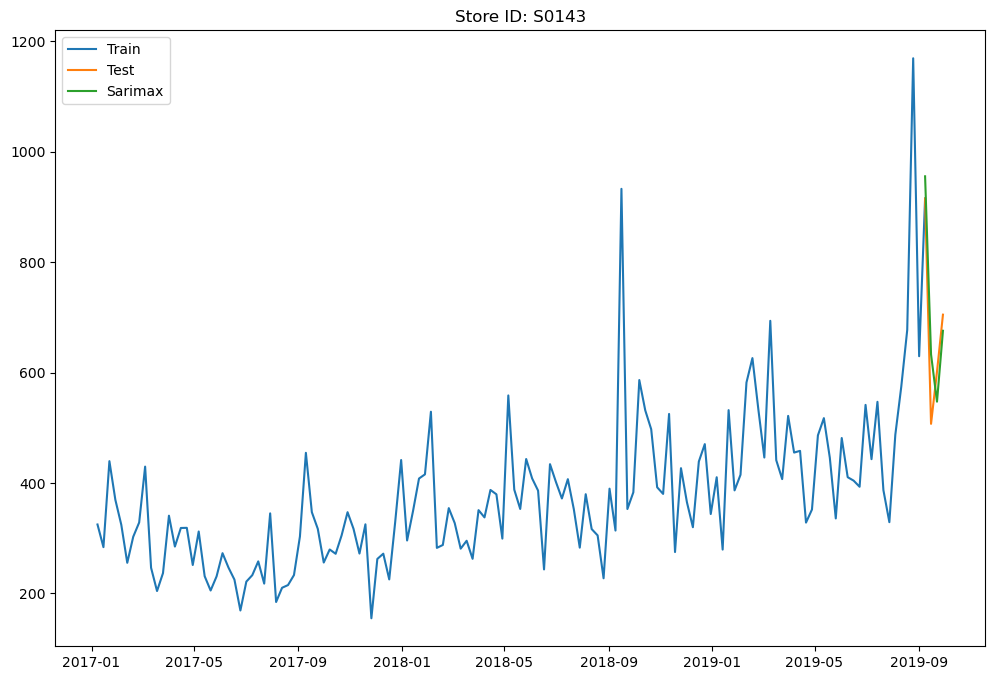

In [184]:
store_ids = ["S0002", "S0003", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(train[train["store_id"] == store_id].loc[:, "revenue"], label='Train')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "revenue"], label='Test')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "Sarimax"], label='Sarimax')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [275]:
rmse_revenue_sarimax = sqrt(mean_squared_error(df_test_sarimax["Sarimax"], df_test_sarimax["revenue"]))
rmse_revenue_sarimax

1169.6142472268145

# Escolha do melhor modelo através da análise do RMSE

In [671]:
revenue = revenue.drop("sales", axis = 1)

In [672]:
revenue["forecast"] = revenue["revenue"]

In [673]:
revenue = revenue.rename(columns={"revenue_avg": "avg", "revenue_arima":"arima", "revenue_arimax":"arimax", "revenue_sarimax":"sarimax"})

In [674]:
revenue

,store_id,revenue,avg,arima,arimax,sarimax,forecast
date,,,,,,,
2017-01-08,S0002,1813.24,1813.240000,1813.240000,1813.240000,1813.240000,1813.24
2017-01-15,S0002,1896.91,1896.910000,1896.910000,1896.910000,1896.910000,1896.91
2017-01-22,S0002,7404.16,7404.160000,7404.160000,7404.160000,7404.160000,7404.16
2017-01-29,S0002,2078.39,2078.390000,2078.390000,2078.390000,2078.390000,2078.39
2017-02-05,S0002,1745.47,1745.470000,1745.470000,1745.470000,1745.470000,1745.47
...,...,...,...,...,...,...,...
2019-10-06,S0143,80.82,369.637095,767.514519,767.514519,955.522650,80.82
2019-10-13,S0143,0.00,369.637095,767.514519,767.514519,632.808537,0.00
2019-10-20,S0143,0.00,369.637095,767.514519,767.514519,547.235761,0.00


In [675]:
rmse["avg_"] = 0
rmse["arima_"] = 0
rmse["arimax_"] = 0
rmse["sarimax_"] = 0

In [676]:
rmse['avg_'] = (rmse['avg'] == rmse[['avg', 'arima', 'arimax', 'sarimax']].min(axis=1)).astype(int)
rmse['arima_'] = (rmse['arima'] == rmse[['avg', 'arima', 'arimax', 'sarimax']].min(axis=1)).astype(int)
rmse['arimax_'] = (rmse['arimax'] == rmse[['avg', 'arima', 'arimax', 'sarimax']].min(axis=1)).astype(int)
rmse['sarimax_'] = (rmse['sarimax'] == rmse[['avg', 'arima', 'arimax', 'sarimax']].min(axis=1)).astype(int)
rmse.loc[rmse['arima_'] == 1, 'arimax_'] = 0

In [698]:
rmse[rmse["avg_"] == 1]

,store_id,avg,arima,arimax,sarimax,avg_,arima_,arimax_,sarimax_
10,S0022,291.337901,715.479672,293.154478,452.359415,1,0,0,0
11,S0023,755.800428,892.340408,907.573834,1284.301488,1,0,0,0
38,S0083,172.782439,389.732221,389.732221,2172.107944,1,0,0,0
41,S0088,156.982543,571.459990,682.781570,416.153922,1,0,0,0
48,S0099,53.094872,370.471582,572.223352,110.422755,1,0,0,0
61,S0142,365.511585,415.882527,415.882527,553.974500,1,0,0,0


In [678]:
# Get the store_ids where avg_ is 1 in the rmse DataFrame
stores_with_avg_1 = rmse.loc[rmse['avg_'] == 1, 'store_id'].tolist()

# Iterate over the store_ids
for store_id in stores_with_avg_1:
    # Get the last 5 rows of avg column for the specific store_id in the revenue DataFrame
    avg_values = revenue.loc[revenue['store_id'] == store_id, 'avg'].tail(5)
    # Update the last 5 rows of forecast column where store_id matches and set avg_ is 1
    revenue.loc[(revenue['store_id'] == store_id) & (revenue.index.isin(avg_values.index)), 'forecast'] = avg_values

In [679]:
revenue[revenue["store_id"] == "S0022"]

,store_id,revenue,avg,arima,arimax,sarimax,forecast
date,,,,,,,
2017-01-08,S0022,1685.83,1685.830000,1685.830000,1685.830000,1685.830000,1685.830000
2017-01-15,S0022,1881.30,1881.300000,1881.300000,1881.300000,1881.300000,1881.300000
2017-01-22,S0022,3807.85,3807.850000,3807.850000,3807.850000,3807.850000,3807.850000
2017-01-29,S0022,1667.58,1667.580000,1667.580000,1667.580000,1667.580000,1667.580000
2017-02-05,S0022,1750.91,1750.910000,1750.910000,1750.910000,1750.910000,1750.910000
...,...,...,...,...,...,...,...
2019-10-06,S0022,278.56,1758.263378,2620.641595,1765.154844,1978.640961,1758.263378
2019-10-13,S0022,0.00,1758.263378,2363.057623,1787.212177,2217.215225,1758.263378
2019-10-20,S0022,0.00,1758.263378,1129.287996,1800.469813,2170.921566,1758.263378


In [686]:
# Get the store_ids where avg_ is 1 in the rmse DataFrame
stores_with_arima_1 = rmse.loc[rmse['arima_'] == 1, 'store_id'].tolist()

# Iterate over the store_ids
for store_id in stores_with_arima_1:
    # Get the last 5 rows of avg column for the specific store_id in the revenue DataFrame
    arima_values = revenue.loc[revenue['store_id'] == store_id, 'arima'].tail(5)
    # Update the last 5 rows of forecast column where store_id matches and set avg_ is 1
    revenue.loc[(revenue['store_id'] == store_id) & (revenue.index.isin(arima_values.index)), 'forecast'] = arima_values
    
revenue[revenue["store_id"] == "S0016"]

,store_id,revenue,avg,arima,arimax,sarimax,forecast
date,,,,,,,
2017-01-08,S0016,383.81,383.810000,383.81000,383.81000,383.810000,383.81000
2017-01-15,S0016,443.74,443.740000,443.74000,443.74000,443.740000,443.74000
2017-01-22,S0016,776.21,776.210000,776.21000,776.21000,776.210000,776.21000
2017-01-29,S0016,547.75,547.750000,547.75000,547.75000,547.750000,547.75000
2017-02-05,S0016,455.07,455.070000,455.07000,455.07000,455.070000,455.07000
...,...,...,...,...,...,...,...
2019-10-06,S0016,196.56,606.967568,766.96723,766.96723,1333.078657,766.96723
2019-10-13,S0016,0.00,606.967568,766.96723,766.96723,1097.892606,766.96723
2019-10-20,S0016,0.00,606.967568,766.96723,766.96723,882.914803,766.96723


In [687]:
# Get the store_ids where avg_ is 1 in the rmse DataFrame
stores_with_arimax_1 = rmse.loc[rmse['arimax_'] == 1, 'store_id'].tolist()

# Iterate over the store_ids
for store_id in stores_with_arimax_1:
    # Get the last 5 rows of avg column for the specific store_id in the revenue DataFrame
    arimax_values = revenue.loc[revenue['store_id'] == store_id, 'arimax'].tail(5)
    # Update the last 5 rows of forecast column where store_id matches and set avg_ is 1
    revenue.loc[(revenue['store_id'] == store_id) & (revenue.index.isin(arimax_values.index)), 'forecast'] = arimax_values

In [688]:
revenue[revenue["store_id"] == "S0058"]

,store_id,revenue,avg,arima,arimax,sarimax,forecast
date,,,,,,,
2017-01-08,S0058,1576.50,1576.500000,1576.500000,1576.500000,1576.500000,1576.500000
2017-01-15,S0058,1728.70,1728.700000,1728.700000,1728.700000,1728.700000,1728.700000
2017-01-22,S0058,4181.89,4181.890000,4181.890000,4181.890000,4181.890000,4181.890000
2017-01-29,S0058,1347.41,1347.410000,1347.410000,1347.410000,1347.410000,1347.410000
2017-02-05,S0058,1643.52,1643.520000,1643.520000,1643.520000,1643.520000,1643.520000
...,...,...,...,...,...,...,...
2019-10-06,S0058,259.49,1557.138108,1676.283916,2096.981745,2658.813542,2096.981745
2019-10-13,S0058,0.00,1557.138108,1621.741573,1878.268442,1980.047645,1878.268442
2019-10-20,S0058,0.00,1557.138108,1606.881063,1918.043893,2046.932173,1918.043893


In [692]:
# Get the store_ids where avg_ is 1 in the rmse DataFrame
stores_with_sarimax_1 = rmse.loc[rmse['sarimax_'] == 1, 'store_id'].tolist()

# Iterate over the store_ids
for store_id in stores_with_sarimax_1:
    # Get the last 5 rows of avg column for the specific store_id in the revenue DataFrame
    sarimax_values = revenue.loc[revenue['store_id'] == store_id, 'sarimax'].tail(5)
    # Update the last 5 rows of forecast column where store_id matches and set avg_ is 1
    revenue.loc[(revenue['store_id'] == store_id) & (revenue.index.isin(sarimax_values.index)), 'forecast'] = sarimax_values
    
revenue[revenue["store_id"] == "S0085"]

,store_id,revenue,avg,arima,arimax,sarimax,forecast
date,,,,,,,
2017-01-08,S0085,8366.38,8366.380000,8366.380000,8366.380000,8366.380000,8366.380000
2017-01-15,S0085,9965.90,9965.900000,9965.900000,9965.900000,9965.900000,9965.900000
2017-01-22,S0085,21354.68,21354.680000,21354.680000,21354.680000,21354.680000,21354.680000
2017-01-29,S0085,10581.92,10581.920000,10581.920000,10581.920000,10581.920000,10581.920000
2017-02-05,S0085,10099.15,10099.150000,10099.150000,10099.150000,10099.150000,10099.150000
...,...,...,...,...,...,...,...
2019-10-06,S0085,2401.59,14046.267568,24511.585252,24511.585252,22477.907968,22477.907968
2019-10-13,S0085,0.00,14046.267568,24511.585252,24511.585252,21179.283601,21179.283601
2019-10-20,S0085,0.00,14046.267568,24511.585252,24511.585252,21040.875946,21040.875946


# Let's plot forecasts

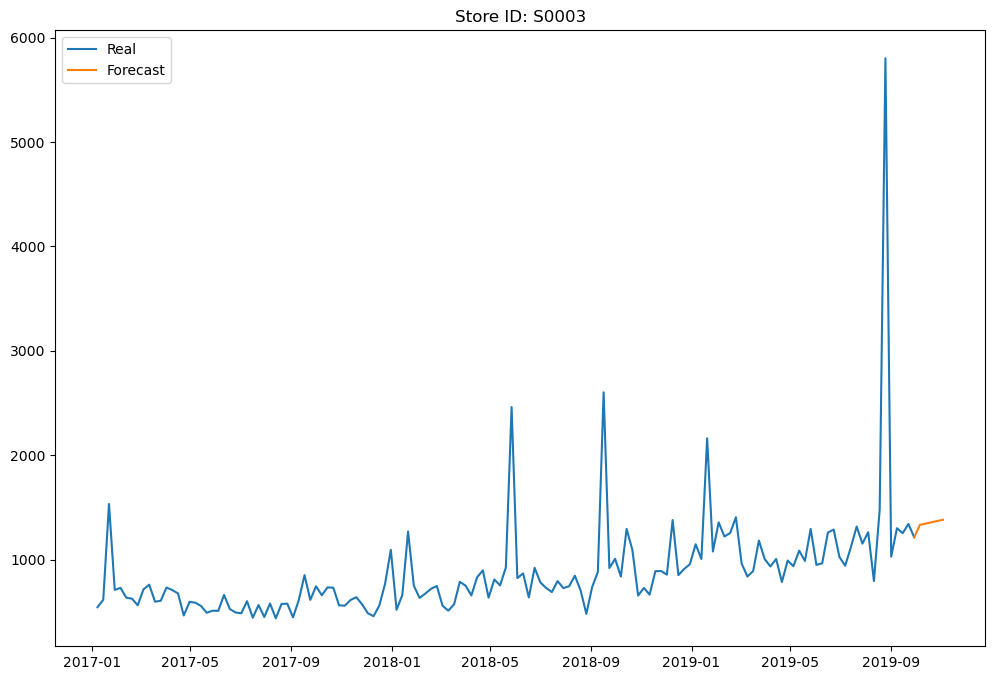

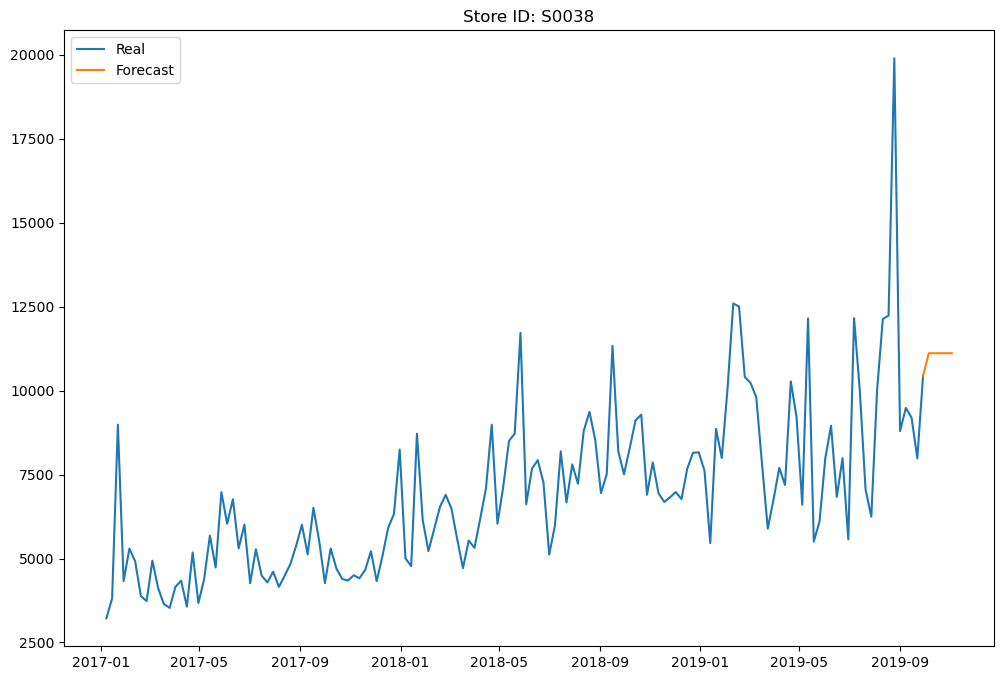

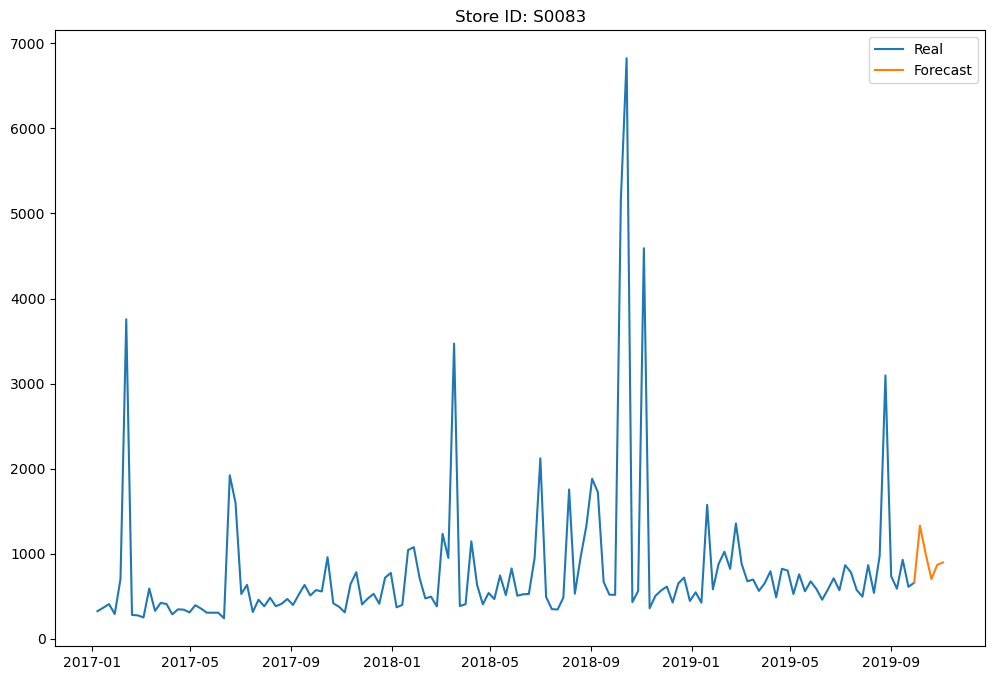

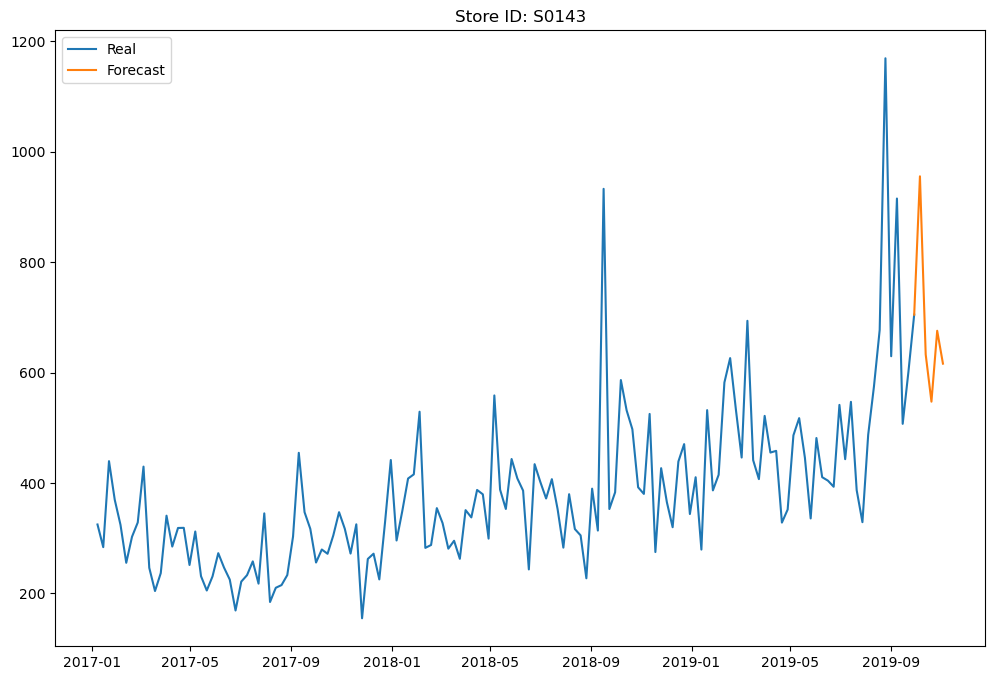

In [697]:
store_ids = ["S0003", "S0038","S0083", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(revenue[(revenue["store_id"] == store_id) & ("2017-01-08" <= revenue.index) & (revenue.index <= "2019-09-29")]["forecast"], label='Real')
    plt.plot(revenue[(revenue["store_id"] == store_id) & (revenue.index >= "2019-09-29")]["forecast"], label='Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()